### SANRAL ZIP-FILES
The goal of this notebook is to explore the SANRAL data to have a better scope of the challenge of the dataset. I started with a brief EDA to examine test how the zipfile package will work on wrangling the VDS dataset while saving memory.
When going through the notebook, the key focus areas are as follows:

- Wrangling of the 2017 and 2018 VDS hourly datasets to gain deeper understanding of the data
- Imputation of missing data using multiple ways such as interpolation and KNN
- Minor EDA of the VDS Hourly, Vehicles and Injuries dataset

### Challenges along the way:
- Imputing data in the categorical columns has proven to be a challenge `vehicle_class_type`, `site_name` and `Injuries_type`. Still working on how to solve this.
- When merging the VDS Hourly datasets, you may experience errors, primarily because the columns have been split differently; some by comas, and others by semi_colons. This might bring some errors but it is solvable.

In [1]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import zipfile as zp

In [2]:
sanral = zp.ZipFile('SANRAL_v2.zip')

# sanral.namelist() - We use this to get path to csv we need
path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC May 2017 Hourly Lane Spec.csv'

# Reading lane semi-colon separated data with no header
May_lanes_2017 = pd.read_csv(sanral.open(path), sep=';', header=None)
print(May_lanes_2017.shape)
May_lanes_2017

(8718, 10)


,0,1,2,3,4,5,6,7,8,9
0,DS VDS 125 IB,2017-05-01,0,1,1,1,78,0.611904,118.133095,87
1,DS VDS 125 IB,2017-05-01,0,1,1,2,9,0.611904,118.133095,87
2,DS VDS 125 IB,2017-05-01,0,1,1,3,0,0.611904,118.133095,87
3,DS VDS 125 IB,2017-05-01,0,2,1,1,118,0.983559,100.119661,148
4,DS VDS 125 IB,2017-05-01,0,2,1,2,22,0.983559,100.119661,148
...,...,...,...,...,...,...,...,...,...,...
8713,DS VDS 125 OB,2017-05-31,23,1,1,2,1,0.536666,115.876444,82
8714,DS VDS 125 OB,2017-05-31,23,1,1,3,3,0.536666,115.876444,82
8715,DS VDS 125 OB,2017-05-31,23,2,1,1,86,1.252307,97.622615,125
8716,DS VDS 125 OB,2017-05-31,23,2,1,2,7,1.252307,97.622615,125


In [3]:
import re
vds_list = sanral.namelist()
vds1_2016 = list(filter(lambda x : re.search(r'(\/2016\/.*\.csv$)', x), vds_list))
vds1_2017 = list(filter(lambda x : re.search(r'(\/2017\/.*\.csv$)', x), vds_list))
vds1_2018 = list(filter(lambda x : re.search(r'(\/2018\/.*\.csv$)', x), vds_list))
vds1_2019 = list(filter(lambda x : re.search(r'(\/2019\/.*\.csv$)', x), vds_list))
vds_list

['SANRAL_v2/',
 'SANRAL_v2/Vehicles2016_2019.csv',
 'SANRAL_v2/Injuries2016_2019.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/',
 'SANRAL_v2/Vehicle detection sensor (VDS)/VariableNames_VDS.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/VDS_locations.xlsx',
 'SANRAL_v2/Vehicle detection sensor (VDS)/Visual_CameraLoc&Names.pdf',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2016/',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2016/WC November 2016 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2016/WC December 2016 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC April 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC October 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC August 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC January 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC December 2017 Hourly.csv',
 'SANRAL_v2/Vehicle det

In [4]:
sorted(vds1_2017)

['SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC April 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC August 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC December 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC February 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC January 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC July 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC June 2017 Hourly Lane spec.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC June 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC March 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC March 2017 Hourly.csv Redone.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC May 2017 Hourly Lane Spec.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC May 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC November 2017 Ho

## Wrangling 2018

In [5]:
# Sorting the datasets
sorted(vds1_2018)

['SANRAL_v2/Vehicle detection sensor (VDS)/2018/11. WC November 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/12. WC December 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/8. WC August 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC December 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC February 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC January 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC March 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC November 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC October 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC September 2018 Hourly.csv']

In [6]:
# Assessing the duplicated datasets
nv_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/11. WC November 2018 Hourly.csv'
nv_2018 = pd.read_csv(sanral.open(nv_path), sep = ',', header = None, parse_dates = [2])
nov_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC November 2018 Hourly.csv'
nov_2018 = pd.read_csv(sanral.open(nov_path), sep = ',', header = None, parse_dates = [2])
nv_2018.head()
print(nv_2018.shape)
print(nov_2018.shape)

(158919, 7)
(158919, 7)


In [7]:
nv_2018.head()

,0,1,2,3,4,5,6
0,WC,DS VDS 229 IB,2018-11-18,15,3,11,105.15
1,WC,VDS 914 IB,2018-11-29,17,2,89,74.08
2,WC,DS VDS 703 North,2018-11-16,11,2,135,98.76
3,WC,DS VDS 214A OB,2018-11-12,23,1,531,101.32
4,WC,DS VDS 229 IB,2018-11-26,6,2,38,108.85


In [8]:
nv_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158919 entries, 0 to 158918
Data columns (total 7 columns):
0    158919 non-null object
1    158919 non-null object
2    158919 non-null datetime64[ns]
3    158919 non-null int64
4    158919 non-null int64
5    158919 non-null int64
6    158913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 8.5+ MB


In [9]:
nov_2018.head()

,0,1,2,3,4,5,6
0,WC,DS VDS 229 IB,2018-11-18,15,3,11,105.15
1,WC,VDS 914 IB,2018-11-29,17,2,89,74.08
2,WC,DS VDS 703 North,2018-11-16,11,2,135,98.76
3,WC,DS VDS 214A OB,2018-11-12,23,1,531,101.32
4,WC,DS VDS 229 IB,2018-11-26,6,2,38,108.85


In [10]:
# Checking if the two datasets are similar
nv_2018.equals(nov_2018)

True

The two datasets are similar therefore we'll do away with one of the datasets

Drop Nov and December??

In [77]:
dc_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/12. WC December 2018 Hourly.csv'
dc_2018 = pd.read_csv(sanral.open(dc_path), sep = ',', header = None, parse_dates = [2])
dec_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC December 2018 Hourly.csv'
dec_2018 = pd.read_csv(sanral.open(dec_path), sep = ',', header = None, parse_dates = [2])
dec_2018.head()
print(dec_2018.shape)
print(dc_2018.shape)

(259293, 7)
(259293, 7)


In [78]:
# Checking of the two datasets are similar
dc_2018.equals(dec_2018)

True

It is likely that the renaming of the datasets may have caused the aforementioned datasets. It would therefore make sense to drop the duplicates. It is also worth noting that 2018 data lacks input from `April` to `July`

In [79]:
vds1_2018

['SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC January 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC October 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC March 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC December 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC February 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC November 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/8. WC August 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC September 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/11. WC November 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/12. WC December 2018 Hourly.csv']

In [80]:
# Doing a deep copy for the above lists
import copy as c
vds2_2018 = c.deepcopy(vds1_2018)
#Removing the renamed datasets
vds2_2018.remove('SANRAL_v2/Vehicle detection sensor (VDS)/2018/12. WC December 2018 Hourly.csv')
vds2_2018.remove('SANRAL_v2/Vehicle detection sensor (VDS)/2018/11. WC November 2018 Hourly.csv')

In [81]:
vds3_2018 = sorted(vds2_2018)
vds3_2018

['SANRAL_v2/Vehicle detection sensor (VDS)/2018/8. WC August 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC December 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC February 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC January 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC March 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC November 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC October 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC September 2018 Hourly.csv']

Opening the datasets to rename the columns and preprocess the data if possible

In [82]:
# from glob import glob
# vds2018 = len(vds3_2018)
# dat = []
# for i in range(vds2018):
#     paths = i
#     dat.append(pd.read_csv(sanral.open(paths), sep = ',', header = None, parse_dates = [2]))
# # vds3_2018[0]

In [83]:
# dfs = {}
# for df, file in zip(dfs, vds3_2018):
#     dfs[df] = pd.read_csv(sanral.open(file), sep = ',', header = None, parse_dates = [2])
#     dfs
#     print(list_of_dfs[df].shape)
#     print(list_of_dfs[df].dtypes)
#     print(list(list_of_dfs[df]))

Might need to open them all one by one

In [96]:
# August Dataset
au_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/8. WC August 2018 Hourly.csv'
au_2018 = pd.read_csv(sanral.open(au_path), sep = ',', header = None, parse_dates = [2])
# December Dataset
dc1_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC December 2018 Hourly.csv'
dc1_2018 = pd.read_csv(sanral.open(dc1_path), sep = ',', header = None, parse_dates = [2])
# February Dataset
f_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC February 2018 Hourly.csv'
f_2018 = pd.read_csv(sanral.open(f_path), sep = ';', header = None, parse_dates = [2])
# January Dataset
j_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC January 2018 Hourly.csv'
j_2018 = pd.read_csv(sanral.open(j_path), sep = ';', header = None, parse_dates = [2])
# March Dataset
mar_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC March 2018 Hourly.csv'
mar_2018 = pd.read_csv(sanral.open(mar_path), sep = ';', header = None, parse_dates = [2])
# November Dataset
nv1_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC November 2018 Hourly.csv'
nv1_2018 = pd.read_csv(sanral.open(nv1_path), sep = ',', header = None, parse_dates = [2])
# October Dataset
o_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC October 2018 Hourly.csv'
o_2018 = pd.read_csv(sanral.open(o_path), sep = ',', header = None, parse_dates = [2])
# September Dataset
s_path = 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC September 2018 Hourly.csv'
s_2018 = pd.read_csv(sanral.open(s_path), sep = ',', header = None, parse_dates = [2])
# j_2018

In [85]:
# v_2018 = {}
# v_2018 = {df1 :'au_2018', df2 :'dc1_2018',df3 :'f_2018',df3 :'j_2018',df4 :'mar_2018',df5 :'nv1_2018',df6 :'o_2018',df7 :'s_2018'}
# # v_2018[df1]


Merging the dataframes might be helpful in accessing vand wrangling the data more efficiently.
Check on Dictionaries and how you could store your DFrames there

### Opening a merged tabled for 2018

In [86]:
hourly_colname = [
"Region",
"Site name",
"Date of Collection Period",
"Hour of Collection Period",
"Vehicle Class Type",
"Total Count of Vehicle Class",
"Average Speed"]

In [87]:
months_2018 = ['January','February','March','August', 'September', 'October', 'November','December']
mn_alph = dict(enumerate(sorted(months_2018)))
mn_ord = dict(enumerate(months_2018))
mn_ord = {k:v for k, v in sorted(mn_ord.items(),key = lambda item:item[1])}
ord_2018 = dict(zip([*mn_alph.keys()],[*mn_ord.items()]))
ord_2018 = {k:v for k, v in sorted(mn_ord.items(),key = lambda item:item[1])}
ord_2018

{3: 'August',
 7: 'December',
 1: 'February',
 0: 'January',
 2: 'March',
 6: 'November',
 5: 'October',
 4: 'September'}

In [88]:
vds3_2018 = [vds3_2018[f] for f in [*ord_2018.keys()]]
vds3_2018

['SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC January 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC September 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC December 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/8. WC August 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC February 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC October 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC November 2018 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2018/WC March 2018 Hourly.csv']

In [89]:
mn_2018 = [(i+ '_2018').lower() for i in months_2018]
mn_2018

['january_2018',
 'february_2018',
 'march_2018',
 'august_2018',
 'september_2018',
 'october_2018',
 'november_2018',
 'december_2018']

In [90]:
def year_hrdf(year_months, data_paths, sep=','):
    hourly_yr_data = {}
    for i, v in enumerate(year_months):
        hourly_yr_data[v] = pd.read_csv(sanral.open(data_paths[i]), sep=sep, header=None)
        hourly_yr_data[v].columns = hourly_colname
        hourly_yr_data[v].columns = hourly_yr_data[v].columns.str.lower().str.replace(' ', '_')
    return hourly_yr_data

In [71]:
# # First quarter is semi-colon separeted
# Q1_2018 = year_hrdf(mn_2018[:3], vds3_2018[:3], sep=';')
# # Last half of the year is coma separeted
# H2_2018 = year_hrdf(mn_2018[3:], vds3_2018[3:])
# H2_2018['september_2018']

In [91]:
mn_2018

['january_2018',
 'february_2018',
 'march_2018',
 'august_2018',
 'september_2018',
 'october_2018',
 'november_2018',
 'december_2018']

In [97]:
# First two months of 2018
q1_2018 = year_hrdf(mn_2018[:1],vds3_2018[:1],';')
# # Second quarter of 2018
q2_2018 = year_hrdf(mn_2018[1:4],vds3_2018[1:4])
# Third quarter of 2018
q3_2018 = year_hrdf(mn_2018[5:7],vds3_2018[5:7])

In [101]:
dc1_2018.columns = hourly_colname
dc1_2018.columns = dc1_2018.columns.str.lower().str.replace(' ', '_')
dc1_2018.head()

,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,WC,DS VDS 220 IB,2018-12-09,13,2,54,92.55
1,WC,DS VDS 309 North,2018-12-02,16,1,2002,103.66
2,WC,DS VDS 222 IB,2018-12-28,16,2,123,96.02
3,WC,DS WTRNX 201 OB,2018-12-02,4,3,0,70.07
4,WC,DS VDS 503 North,2018-12-13,3,1,87,90.18


In [102]:
s_2018. columns = hourly_colname
s_2018.columns = s_2018.columns.str.lower().str.replace(' ', '_')
s_2018.head()

,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,WC,DS WTRNX 407 OB,2018-09-26,14,2,28,67.58
1,WC,DS VDS 229 OB,2018-09-30,5,3,3,112.50
2,WC,DS VDS 116 OB,2018-09-22,19,2,65,96.76
3,WC,VDS 207 IB,2018-09-29,23,3,2,96.46
4,WC,DS VDS 202 OB,2018-09-18,3,2,4,90.16


From the above description, It appears as though certain columns are separated by `,` and some by `;`

In [197]:
# Concatenating the datasets
d1_2018 = {**q1_2018,**q2_2018,**q3_2018}
d1_2018.keys()

dict_keys(['january_2018', 'february_2018', 'march_2018', 'august_2018', 'october_2018', 'november_2018'])

In [199]:
d1_2018['march_2018'].head()

,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,WC,DS VDS 220 IB,2018-12-09 00:00:00.0000000,13,2,54,92.55
1,WC,DS VDS 309 North,2018-12-02 00:00:00.0000000,16,1,2002,103.66
2,WC,DS VDS 222 IB,2018-12-28 00:00:00.0000000,16,2,123,96.02
3,WC,DS WTRNX 201 OB,2018-12-02 00:00:00.0000000,4,3,0,70.07
4,WC,DS VDS 503 North,2018-12-13 00:00:00.0000000,3,1,87,90.18


In [200]:
# Concatenating the dataframes
df_2018 = pd.concat(d1_2018.values(),ignore_index = True)
frames = [df_2018,s_2018,dc1_2018]
df1_2018 = pd.concat(frames)
print(df1_2018.shape)
df1_2018.head()

(2031591, 7)


,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,WC,DS VDS 101 IB,2018-01-01 00:00:00.0000000,2,1,701,115.45
1,WC,DS VDS 101 IB,2018-01-01 00:00:00.0000000,2,2,11,115.45
2,WC,DS VDS 101 IB,2018-01-01 00:00:00.0000000,2,3,1,115.45
3,WC,DS VDS 101 OB,2018-01-01 00:00:00.0000000,2,1,1597,94.85
4,WC,DS VDS 101 OB,2018-01-01 00:00:00.0000000,2,2,10,94.85


In [201]:
# Checking for null values
df1_2018.isna().sum()

region                            0
site_name                         0
date_of_collection_period         0
hour_of_collection_period         0
vehicle_class_type                0
total_count_of_vehicle_class      0
average_speed                   117
dtype: int64

In [117]:
# Percentage of missing values in 2018
(117/2031591)*100

0.005759033191227958

The above calculation shows that the percentage of missing values is minimal. Therefore, removing the missing values will not affect the data much  

In [118]:
# Dropping null values
dr_2018 = df1_2018.dropna()
# Cleaning up RAM
# df1_2018 = 0
dr_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031474 entries, 0 to 259292
Data columns (total 7 columns):
region                          object
site_name                       object
date_of_collection_period       object
hour_of_collection_period       int64
vehicle_class_type              int64
total_count_of_vehicle_class    int64
average_speed                   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 124.0+ MB


In [120]:
# Changing datatypes
dr_2018['date_of_collection_period'] = pd.to_datetime(dr_2018['date_of_collection_period'])
print(dr_2018.shape)
dr_2018.dtypes

(2031474, 7)


region                                  object
site_name                               object
date_of_collection_period       datetime64[ns]
hour_of_collection_period                int64
vehicle_class_type                       int64
total_count_of_vehicle_class             int64
average_speed                          float64
dtype: object

**Predict missing 2018 data: April-July 2018**
1. Day of week 
2. Day of the month
3. Week of the year
4. hour of collection (might not require prediction)
5. Month of the year
6. Average speed
7. Vehicle type
8. Total Count of Vehicles

**Suggestions:**
- Generate a datetime date range  `pd.date_range` from April to July that will work as a segment to make predictions for
- Extracting hour of collection



### Wrangling 2017 data

In [121]:
vds1_2017

['SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC April 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC October 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC August 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC January 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC December 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC July 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC June 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC May 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC March 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC February 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC November 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC September 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC May 2017 Hourly Lane Spec.csv',
 'S

In [122]:
months_2017 = ['January','February', 'March', 'March_redone','April','May','May_lane','June','June_lane','July', 'August','Spetember','October','November','December']
mnth_dict = dict(enumerate(months_2017))
mon_dict = {k:v for k, v in sorted(mnth_dict.items(),key= lambda item:item[1])}
mon_dict

{4: 'April',
 10: 'August',
 14: 'December',
 1: 'February',
 0: 'January',
 9: 'July',
 7: 'June',
 8: 'June_lane',
 2: 'March',
 3: 'March_redone',
 5: 'May',
 6: 'May_lane',
 13: 'November',
 12: 'October',
 11: 'Spetember'}

In [123]:
mn_alph = dict(enumerate(sorted(months_2017)))
mon_alph = list(mn_alph.items())
mn_alph

{0: 'April',
 1: 'August',
 2: 'December',
 3: 'February',
 4: 'January',
 5: 'July',
 6: 'June',
 7: 'June_lane',
 8: 'March',
 9: 'March_redone',
 10: 'May',
 11: 'May_lane',
 12: 'November',
 13: 'October',
 14: 'Spetember'}

In [124]:
ord_dict = dict(zip(mon_dict,mn_alph))
test = {k:v for k,v in sorted(ord_dict.items(), key=lambda item: item[0])}
test
test_ord =[x for x in test.values()]
test_ord

[4, 3, 8, 9, 0, 10, 11, 6, 7, 5, 1, 14, 13, 12, 2]

In [126]:
vds3_2017 = [vds1_2017[i] for i in test_ord]
vds3_2017

['SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC December 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC January 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC March 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC February 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC April 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC November 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC September 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC June 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC May 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC July 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC October 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC March 2017 Hourly.csv Redone.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC June 2017 Hourly Lane spe

In [127]:
# Removing lanes data from the vds data
may_lane = vds3_2017.pop(-2)
june_lane = vds3_2017.pop(-2)

In [128]:
vds3_2017

['SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC December 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC January 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC March 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC February 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC April 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC November 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC September 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC June 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC May 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC July 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC October 2017 Hourly.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC March 2017 Hourly.csv Redone.csv',
 'SANRAL_v2/Vehicle detection sensor (VDS)/2017/WC August 2017 Hourly.csv']

In [129]:
may = months_2017.pop(6)
june = months_2017.pop(7)
months_2017
df_2017 = year_hrdf(months_2017,vds3_2017,';')

Will focus on the lane months later. For now, key focus is on the hourly data

In [130]:
mar = df_2017['March']
mar.head()

,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,WC,DS VDS 101 IB,2017-03-01 00:00:00.0000000,0,1,376,105.78
1,WC,DS VDS 101 IB,2017-03-01 00:00:00.0000000,0,2,10,105.78
2,WC,DS VDS 101 IB,2017-03-01 00:00:00.0000000,0,3,34,105.78
3,WC,DS VDS 101 OB,2017-03-01 00:00:00.0000000,0,1,798,99.52
4,WC,DS VDS 101 OB,2017-03-01 00:00:00.0000000,0,2,16,99.52


There are two `March` datasets. Opting to discard the original march datast and work with `March_redone` dataset

In [131]:
del df_2017['March']
list(df_2017)

['January',
 'February',
 'March_redone',
 'April',
 'May',
 'June',
 'July',
 'August',
 'Spetember',
 'October',
 'November',
 'December']

In [132]:
df2_2017 = pd.concat(df_2017.values(),ignore_index = True)
df_2017 = 0
print(df2_2017.shape)
df2_2017.head()

(3173004, 7)


,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,WC,DS VDS 101 IB,2017-12-01 00:00:00.0000000,2,1,113,100.82
1,WC,DS VDS 101 IB,2017-12-01 00:00:00.0000000,2,2,4,100.82
2,WC,DS VDS 101 IB,2017-12-01 00:00:00.0000000,2,3,14,100.82
3,WC,DS VDS 101 OB,2017-12-01 00:00:00.0000000,2,1,275,100.25
4,WC,DS VDS 101 OB,2017-12-01 00:00:00.0000000,2,2,2,100.25


In [133]:
# Checking for null values
df2_2017.isna().sum()

region                             0
site_name                          0
date_of_collection_period          0
hour_of_collection_period          0
vehicle_class_type                 0
total_count_of_vehicle_class       0
average_speed                   4455
dtype: int64

In [136]:
# Percentage of null values
(4455/3173004)*100

0.14040322672142863

The perc of the null values are negligible (***0.14%***) and can therefore be dropped

In [137]:
dr_2017 = df2_2017.dropna()
dr_2017.shape

(3168549, 7)

In [138]:
#Cleaning ram
df2_2017 = 0
#Changing Datatypes
dr_2017['date_of_collection_period'] = pd.to_datetime(dr_2017['date_of_collection_period'])
dr_2017.dtypes

region                                  object
site_name                               object
date_of_collection_period       datetime64[ns]
hour_of_collection_period                int64
vehicle_class_type                       int64
total_count_of_vehicle_class             int64
average_speed                          float64
dtype: object

In [141]:
# Wrangling first two months of 2018
q1_2018.keys()

dict_keys(['january_2018'])

In [142]:
Q1_2018 = pd.concat(q1_2018.values(),ignore_index = True)
print(Q1_2018.shape)
Q1_2018.head()

(281247, 7)


,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,WC,DS VDS 101 IB,2018-01-01 00:00:00.0000000,2,1,701,115.45
1,WC,DS VDS 101 IB,2018-01-01 00:00:00.0000000,2,2,11,115.45
2,WC,DS VDS 101 IB,2018-01-01 00:00:00.0000000,2,3,1,115.45
3,WC,DS VDS 101 OB,2018-01-01 00:00:00.0000000,2,1,1597,94.85
4,WC,DS VDS 101 OB,2018-01-01 00:00:00.0000000,2,2,10,94.85


In [143]:
# Checking for null values
Q1_2018.isna().sum()

region                           0
site_name                        0
date_of_collection_period        0
hour_of_collection_period        0
vehicle_class_type               0
total_count_of_vehicle_class     0
average_speed                   63
dtype: int64

In [144]:
# Percentage of null values
NaN = (63/281247)*100
NaN

0.022400238935881982

In [145]:
#Dropping null values
Q2_2018 = Q1_2018.dropna()
print(Q2_2018.isna().sum())
print('*'*50)
print('Datatypes of Q2_2018')
print('*'*50)
print(Q2_2018.dtypes)


region                          0
site_name                       0
date_of_collection_period       0
hour_of_collection_period       0
vehicle_class_type              0
total_count_of_vehicle_class    0
average_speed                   0
dtype: int64
**************************************************
Datatypes of Q2_2018
**************************************************
region                           object
site_name                        object
date_of_collection_period        object
hour_of_collection_period         int64
vehicle_class_type                int64
total_count_of_vehicle_class      int64
average_speed                   float64
dtype: object


In [146]:
#Cleaning 
Q1_2018 = 0
# Changing Datatypes
Q2_2018['date_of_collection_period'] = pd.to_datetime(Q2_2018['date_of_collection_period'])
Q2_2018.dtypes

region                                  object
site_name                               object
date_of_collection_period       datetime64[ns]
hour_of_collection_period                int64
vehicle_class_type                       int64
total_count_of_vehicle_class             int64
average_speed                          float64
dtype: object

In [147]:
# Concatenating 2017 data and the first quarter of 2018
df = pd.concat([dr_2017,Q2_2018], ignore_index = True)
# #Cleaning
# dr_2017 = 0 
# Q2_2018 = 0
# Shape and DataFrame of df 
print(df.shape)
df.head()

(3449733, 7)


,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,WC,DS VDS 101 IB,2017-12-01,2,1,113,100.82
1,WC,DS VDS 101 IB,2017-12-01,2,2,4,100.82
2,WC,DS VDS 101 IB,2017-12-01,2,3,14,100.82
3,WC,DS VDS 101 OB,2017-12-01,2,1,275,100.25
4,WC,DS VDS 101 OB,2017-12-01,2,2,2,100.25


Splitting the data on date. Opting to use 2017 data to train the MLPRegressor and use the first two months in 2018 as test.
Before then, will make a drop the `region` column.

In [148]:
df.drop(['region'],axis = 1,inplace = True)
df.head()

,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,DS VDS 101 IB,2017-12-01,2,1,113,100.82
1,DS VDS 101 IB,2017-12-01,2,2,4,100.82
2,DS VDS 101 IB,2017-12-01,2,3,14,100.82
3,DS VDS 101 OB,2017-12-01,2,1,275,100.25
4,DS VDS 101 OB,2017-12-01,2,2,2,100.25


In [149]:
# Splitting train set by date
train = df.loc[df['date_of_collection_period'] <= '2017-08-31']
train = train.loc[train['date_of_collection_period']>= '2017-01-01']

Minor feature Engineering

In [150]:
# train['month'] = train['date_of_collection_period'].dt.month
# train['day'] = train['date_of_collection_period'].dt.day
# train['week'] = train['date_of_collection_period'].dt.week
# train['weekday'] = train['date_of_collection_period'].dt.weekday
train.head()

,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
272352,DS VDS 101 IB,2017-01-01,0,1,837,103.62
272353,DS VDS 101 IB,2017-01-01,0,2,3,103.62
272354,DS VDS 101 IB,2017-01-01,0,3,1,103.62
272355,DS VDS 101 OB,2017-01-01,0,1,1984,96.40
272356,DS VDS 101 OB,2017-01-01,0,2,8,96.40


In [151]:
t1 = train.copy()
t1.drop(['site_name','date_of_collection_period'],axis = 1,inplace =True)
t1.head()

,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
272352,0,1,837,103.62
272353,0,2,3,103.62
272354,0,3,1,103.62
272355,0,1,1984,96.40
272356,0,2,8,96.40


In [152]:
# Splitting the test set to include first two months of 2018
test = df.loc[df['date_of_collection_period'] <= '2018-01-31']
test = test.loc[test['date_of_collection_period'] >= '2017-09-01']
test.head()

,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,DS VDS 101 IB,2017-12-01,2,1,113,100.82
1,DS VDS 101 IB,2017-12-01,2,2,4,100.82
2,DS VDS 101 IB,2017-12-01,2,3,14,100.82
3,DS VDS 101 OB,2017-12-01,2,1,275,100.25
4,DS VDS 101 OB,2017-12-01,2,2,2,100.25


In [153]:
# test['month'] = test['date_of_collection_period'].dt.month
# test['day'] = test['date_of_collection_period'].dt.day
# test['week'] = test['date_of_collection_period'].dt.week
# test['weekday'] = test['date_of_collection_period'].dt.weekday
test.head()

,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,DS VDS 101 IB,2017-12-01,2,1,113,100.82
1,DS VDS 101 IB,2017-12-01,2,2,4,100.82
2,DS VDS 101 IB,2017-12-01,2,3,14,100.82
3,DS VDS 101 OB,2017-12-01,2,1,275,100.25
4,DS VDS 101 OB,2017-12-01,2,2,2,100.25


In [154]:
tt1 = test.copy()
tt1.drop(['site_name','date_of_collection_period'],axis = 1, inplace = True)
tt1.head()

,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,2,1,113,100.82
1,2,2,4,100.82
2,2,3,14,100.82
3,2,1,275,100.25
4,2,2,2,100.25


In [349]:
test.head()

,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed,month,day,week,weekday
2641677,DS VDS 101 IB,2018-01-01,2,1,701,115.45,1,1,1,0
2641678,DS VDS 101 IB,2018-01-01,2,2,11,115.45,1,1,1,0
2641679,DS VDS 101 IB,2018-01-01,2,3,1,115.45,1,1,1,0
2641680,DS VDS 101 OB,2018-01-01,2,1,1597,94.85,1,1,1,0
2641681,DS VDS 101 OB,2018-01-01,2,2,10,94.85,1,1,1,0


### Minor EDA on the test and train

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

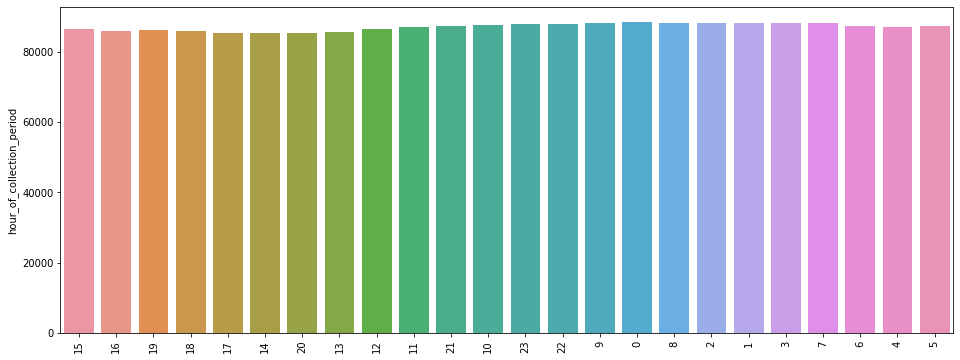

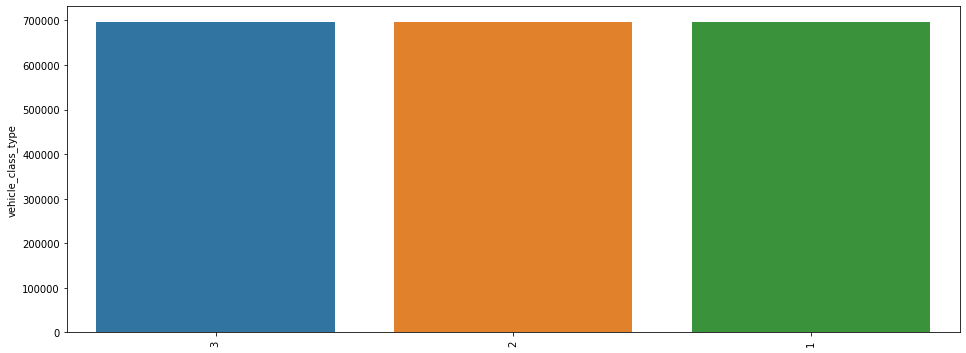

In [156]:
# Visualization on the train categorical variables
cat_cols = train[['hour_of_collection_period','vehicle_class_type']]
# cat_cols
def vi_cat(data,cols):
    for col in cols:
        fig = plt.figure(figsize = (16,6))
        counts = cols[col].value_counts()
        labels = cols[col].value_counts().index
        ax = fig.gca()
        sns.barplot(x=labels, y=counts, ax=ax)
        ax.set_xticklabels(labels, rotation=90)
        plt.show
vi_cat(train,cat_cols)

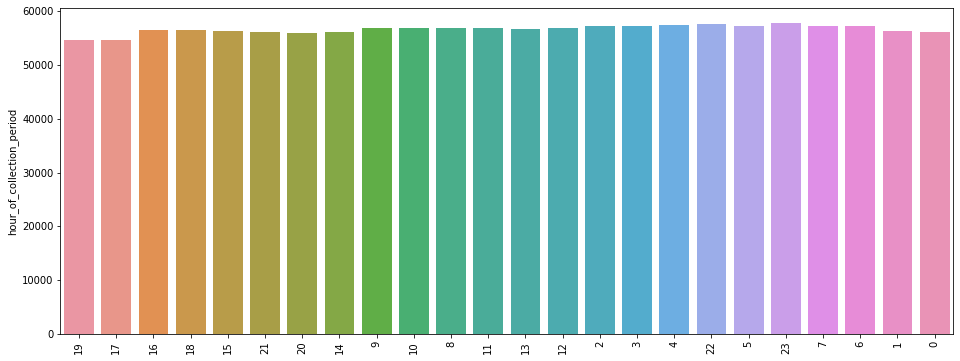

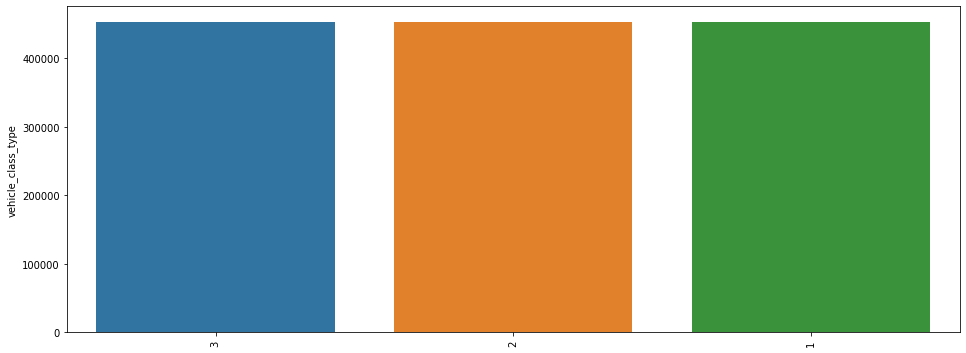

In [158]:
# Visualization on the test categorical variables
cat_tt = test[['hour_of_collection_period','vehicle_class_type']]
vi_cat(test,cat_tt)

From the visualizations above, it appears there is minimal variation in the `month`,`vehicle_class_type`,`weekday`,`hour_of_collection_period` columns in both the train and test datasets. Perhaps, attempting to remove the columns with minimal information might be helpful in improving model performance

In [159]:
# Creating a DataFrame for the section being predicted
m_2018 = pd.date_range('2018-04-01','2018-07-31',freq ='1h')
tr_2018 = pd.DataFrame({'date_of_collection_period':m_2018})
# Change Datatype
tr_2018['date_of_collection_period'] = pd.to_datetime(tr_2018['date_of_collection_period'])
tr_2018['hour_of_collection_period'] = tr_2018['date_of_collection_period'].dt.hour
tr_2018.head()

,date_of_collection_period,hour_of_collection_period
0,2018-04-01 00:00:00,0
1,2018-04-01 01:00:00,1
2,2018-04-01 02:00:00,2
3,2018-04-01 03:00:00,3
4,2018-04-01 04:00:00,4


In [170]:
# Creating new columns
tr_pr = tr_2018.copy()
tr_pr['vehicle_class_type'] = np.nan
tr_pr['total_count_of_vehicle_class'] = np.nan
tr_pr['average_speed'] = np.nan
print(tr_pr.shape)
tr_pr.head()

(2905, 5)


,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,2018-04-01 00:00:00,0,NaN,NaN,NaN
1,2018-04-01 01:00:00,1,NaN,NaN,NaN
2,2018-04-01 02:00:00,2,NaN,NaN,NaN
3,2018-04-01 03:00:00,3,NaN,NaN,NaN
4,2018-04-01 04:00:00,4,NaN,NaN,NaN


It appears as though certain months are missing from the dataset. I will attempt to concat the dataset to avoid missing crucial months

In [206]:
# Renaming Feb columns
f_2018.columns = hourly_colname
f_2018.columns = f_2018.columns.str.lower().str.replace(' ', '_')
# Renaming March columns
mar_2018.columns = hourly_colname
mar_2018.columns = mar_2018.columns.str.lower().str.replace(' ', '_')
print(f_2018.shape)
print(mar_2018.shape)

(246399, 7)
(282537, 7)


In [209]:
# Concatenating datasets
frames = [df1_2018,f_2018,mar_2018]
df3_2018 = pd.concat(frames)
print(df3_2018.shape)
df3_2018.head()

(2560527, 7)


,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,WC,DS VDS 101 IB,2018-01-01 00:00:00.0000000,2,1,701,115.45
1,WC,DS VDS 101 IB,2018-01-01 00:00:00.0000000,2,2,11,115.45
2,WC,DS VDS 101 IB,2018-01-01 00:00:00.0000000,2,3,1,115.45
3,WC,DS VDS 101 OB,2018-01-01 00:00:00.0000000,2,1,1597,94.85
4,WC,DS VDS 101 OB,2018-01-01 00:00:00.0000000,2,2,10,94.85


In [211]:
# Changing the datatype of the Date column
df2_2018 = df3_2018.copy()
df2_2018['date_of_collection_period'] = pd.to_datetime(df2_2018['date_of_collection_period'])
# df2_2018['month'] = df2_2018['date_of_collection_period'].dt.month_name()
# df2_2018['month'].value_counts()

The sectioned out dataset add 2905 rows to the 2018 dataset

In [212]:
# Concatenating full 2018 data
fr = [df2_2018,tr_pr]
tdr = pd.concat(fr, sort = False)
print(tdr.shape)
tdr.head()

(2563432, 7)


,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,WC,DS VDS 101 IB,2018-01-01,2,1.0,701.0,115.45
1,WC,DS VDS 101 IB,2018-01-01,2,2.0,11.0,115.45
2,WC,DS VDS 101 IB,2018-01-01,2,3.0,1.0,115.45
3,WC,DS VDS 101 OB,2018-01-01,2,1.0,1597.0,94.85
4,WC,DS VDS 101 OB,2018-01-01,2,2.0,10.0,94.85


In [213]:
# Checking the current stats in OG 2018 dataset
df2_2018.describe()

,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
count,2.560527e+06,2.560527e+06,2.560527e+06,2.560317e+06
mean,1.155024e+01,2.000000e+00,5.224161e+02,9.120049e+01
std,6.907950e+00,8.164967e-01,9.570274e+02,1.577283e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,6.030000e+00
25%,6.000000e+00,1.000000e+00,1.900000e+01,8.347000e+01
50%,1.200000e+01,2.000000e+00,7.200000e+01,9.549000e+01
75%,1.800000e+01,3.000000e+00,4.230000e+02,1.022400e+02
max,2.300000e+01,3.000000e+00,8.304000e+03,1.402800e+02


In [214]:
tdr_1 = tdr.copy()
tdr_1['month'] = tdr_1['date_of_collection_period'].dt.month_name()
tdr_1.head()

,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed,month
0,WC,DS VDS 101 IB,2018-01-01,2,1.0,701.0,115.45,January
1,WC,DS VDS 101 IB,2018-01-01,2,2.0,11.0,115.45,January
2,WC,DS VDS 101 IB,2018-01-01,2,3.0,1.0,115.45,January
3,WC,DS VDS 101 OB,2018-01-01,2,1.0,1597.0,94.85,January
4,WC,DS VDS 101 OB,2018-01-01,2,2.0,10.0,94.85,January


In [215]:
# Checking for null values
tdr_1.isna().sum()

region                          2905
site_name                       2905
date_of_collection_period          0
hour_of_collection_period          0
vehicle_class_type              2905
total_count_of_vehicle_class    2905
average_speed                   3115
month                              0
dtype: int64

In [219]:
tdr_1['month'].value_counts()

September    536448
December     518586
March        282537
January      281247
August       272391
October      264000
February     246399
November     158919
May             744
July            721
June            720
April           720
Name: month, dtype: int64

### Attempting Interpolation to fill in the missing values 
- The input in the missing months total to **2,905** datapoints. 
- There is a difference in these datapoints compared to the other months 
- Will attempt to run an $R^2$ score to see the performance of the interpolation

In [223]:
# New missing column
# tdr_1 = tdr_1.assign(missing = np.nan)
# tdr_1.missing[tdr_1.average_speed.isna()] = df2_2018.average_speed

In [251]:
# Using Interpolation to fill in missing data
tdr_1 = tdr_1.assign(average_speed_new = tdr_1.average_speed.interpolate(method = 'linear'))

In [252]:
tdr_1.head()

,region,site_name,date_of_collection_period,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed,month,missing,average_speed_new
0,WC,DS VDS 101 IB,2018-01-01,2,1.0,701.0,115.45,January,NaN,115.45
1,WC,DS VDS 101 IB,2018-01-01,2,2.0,11.0,115.45,January,NaN,115.45
2,WC,DS VDS 101 IB,2018-01-01,2,3.0,1.0,115.45,January,NaN,115.45
3,WC,DS VDS 101 OB,2018-01-01,2,1.0,1597.0,94.85,January,NaN,94.85
4,WC,DS VDS 101 OB,2018-01-01,2,2.0,10.0,94.85,January,NaN,94.85


In [316]:
# Comparing linear interpolation from time interpolation
tdr_2 = tdr_1.copy()
tdr_2.set_index('date_of_collection_period', inplace = True)
# tdr_2.assign(average_speed_time = tdr_2.average_speed.interpolate(method = 'time'))
# tdr_2.head()

In [317]:
tdr_2 = tdr_2.assign(average_speed_time = tdr_2.average_speed.interpolate(method = 'time'))
tdr_2.head()

,region,site_name,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed,month,missing,average_speed_new,average_speed_time
date_of_collection_period,,,,,,,,,,
2018-01-01,WC,DS VDS 101 IB,2,1.0,701.0,115.45,January,NaN,115.45,115.45
2018-01-01,WC,DS VDS 101 IB,2,2.0,11.0,115.45,January,NaN,115.45,115.45
2018-01-01,WC,DS VDS 101 IB,2,3.0,1.0,115.45,January,NaN,115.45,115.45
2018-01-01,WC,DS VDS 101 OB,2,1.0,1597.0,94.85,January,NaN,94.85,94.85
2018-01-01,WC,DS VDS 101 OB,2,2.0,10.0,94.85,January,NaN,94.85,94.85


In [318]:
# Dropping missing column
tdr_2.drop('missing', axis = 1, inplace = True)
tdr_2.head()

,region,site_name,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed,month,average_speed_new,average_speed_time
date_of_collection_period,,,,,,,,,
2018-01-01,WC,DS VDS 101 IB,2,1.0,701.0,115.45,January,115.45,115.45
2018-01-01,WC,DS VDS 101 IB,2,2.0,11.0,115.45,January,115.45,115.45
2018-01-01,WC,DS VDS 101 IB,2,3.0,1.0,115.45,January,115.45,115.45
2018-01-01,WC,DS VDS 101 OB,2,1.0,1597.0,94.85,January,94.85,94.85
2018-01-01,WC,DS VDS 101 OB,2,2.0,10.0,94.85,January,94.85,94.85


In [319]:
# Attempting to assess the accuracy of the interpolation
from sklearn.metrics import r2_score

In [320]:
results  = [(method, r2_score(tdr_2.average_speed_new,tdr_2[method])) for method in list(tdr_2)[8:]]
results_df = pd.DataFrame(np.array(results),columns = ['Method','R_squared'])

In [321]:
results_df

,Method,R_squared
0,average_speed_time,0.9999758964854863


Calculating the accuracy of the interpolation is quite challenging seeing as there is no full data on the average_speed column. However, there is minimal difference between the linear and time interpolation

In [322]:
tdr_2.isna().sum()

region                          2905
site_name                       2905
hour_of_collection_period          0
vehicle_class_type              2905
total_count_of_vehicle_class    2905
average_speed                   3115
month                              0
average_speed_new                  0
average_speed_time                 0
dtype: int64

In [323]:
# Using Interpolation for the total_count_of_vehicle_class
tdr_2 = tdr_2 = tdr_2.assign(total_count_of_vehicle_class_new = tdr_2.total_count_of_vehicle_class.interpolate(method = 'linear'))
tdr_2.head()

,region,site_name,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed,month,average_speed_new,average_speed_time,total_count_of_vehicle_class_new
date_of_collection_period,,,,,,,,,,
2018-01-01,WC,DS VDS 101 IB,2,1.0,701.0,115.45,January,115.45,115.45,701.0
2018-01-01,WC,DS VDS 101 IB,2,2.0,11.0,115.45,January,115.45,115.45,11.0
2018-01-01,WC,DS VDS 101 IB,2,3.0,1.0,115.45,January,115.45,115.45,1.0
2018-01-01,WC,DS VDS 101 OB,2,1.0,1597.0,94.85,January,94.85,94.85,1597.0
2018-01-01,WC,DS VDS 101 OB,2,2.0,10.0,94.85,January,94.85,94.85,10.0


For vehicle_class_type, I will use KNN to impute the missing data in 2018

In [479]:
# Making a deep copy
tdr_3 = tdr_2.copy()
#Reseting index
tdr_3.reset_index('date_of_collection_period', inplace = True)
# Dropping the column with missing data
tdr_3.drop(['total_count_of_vehicle_class','average_speed','average_speed_time'], axis = 1, inplace = True)
tdr_3.head()

,date_of_collection_period,region,site_name,hour_of_collection_period,vehicle_class_type,month,average_speed_new,total_count_of_vehicle_class_new
0,2018-01-01,WC,DS VDS 101 IB,2,1.0,January,115.45,701.0
1,2018-01-01,WC,DS VDS 101 IB,2,2.0,January,115.45,11.0
2,2018-01-01,WC,DS VDS 101 IB,2,3.0,January,115.45,1.0
3,2018-01-01,WC,DS VDS 101 OB,2,1.0,January,94.85,1597.0
4,2018-01-01,WC,DS VDS 101 OB,2,2.0,January,94.85,10.0


In [480]:
# Checking count of null values
tdr_3.isna().sum()

date_of_collection_period              0
region                              2905
site_name                           2905
hour_of_collection_period              0
vehicle_class_type                  2905
month                                  0
average_speed_new                      0
total_count_of_vehicle_class_new       0
dtype: int64

It is worth noting that the value counts of the added/missing months are significantly lower than the other months. Perhaps this could affect the credibility of the data in some way

#### Using KNN to impute data for vehicle_class_type

In [481]:
# First, filling region name
tdr_3['region'].fillna('WC', inplace = True)
# Checking for null values
tdr_3.isna().sum()

date_of_collection_period              0
region                                 0
site_name                           2905
hour_of_collection_period              0
vehicle_class_type                  2905
month                                  0
average_speed_new                      0
total_count_of_vehicle_class_new       0
dtype: int64

In [367]:
# Creating a deep copy
tdr_4 = tdr_3.copy()
# Dropping region name and site name
tdr_4.drop(['region','site_name'],axis = 1, inplace = True)
tdr_4.head()

,date_of_collection_period,hour_of_collection_period,vehicle_class_type,month,average_speed_new,total_count_of_vehicle_class_new
0,2018-01-01,2,1.0,January,115.45,701.0
1,2018-01-01,2,2.0,January,115.45,11.0
2,2018-01-01,2,3.0,January,115.45,1.0
3,2018-01-01,2,1.0,January,94.85,1597.0
4,2018-01-01,2,2.0,January,94.85,10.0


In [390]:
! pip install impyute

In [431]:
# Importing the KNeighbours Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
import sys
from impyute.imputation.cs import fast_knn

In [383]:
# Making a deep copy 
tdr_5 = tdr_4.copy()
tdr_5.head()

,date_of_collection_period,hour_of_collection_period,vehicle_class_type,month,average_speed_new,total_count_of_vehicle_class_new
0,2018-01-01,2,1.0,January,115.45,701.0
1,2018-01-01,2,2.0,January,115.45,11.0
2,2018-01-01,2,3.0,January,115.45,1.0
3,2018-01-01,2,1.0,January,94.85,1597.0
4,2018-01-01,2,2.0,January,94.85,10.0


In [384]:
# Dropping columns to fit the impyute
tdr_5.drop(['date_of_collection_period','month'],axis = 1, inplace = True)
tdr_5.head()

,hour_of_collection_period,vehicle_class_type,average_speed_new,total_count_of_vehicle_class_new
0,2,1.0,115.45,701.0
1,2,2.0,115.45,11.0
2,2,3.0,115.45,1.0
3,2,1.0,94.85,1597.0
4,2,2.0,94.85,10.0


In [444]:
tdr_5.isna().sum()

hour_of_collection_period              0
vehicle_class_type                  2905
average_speed_new                      0
total_count_of_vehicle_class_new       0
dtype: int64

In [445]:
y = tdr_5[tdr_5['vehicle_class_type'].isna()]
y.drop('vehicle_class_type', axis = 1, inplace = True)
x_tt = np.array(y)
x_tt

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([[ 0.  , 86.99,  1.  ],
       [ 1.  , 86.99,  1.  ],
       [ 2.  , 86.99,  1.  ],
       ...,
       [22.  , 86.99,  1.  ],
       [23.  , 86.99,  1.  ],
       [ 0.  , 86.99,  1.  ]])

In [425]:
y = np.array(tdr_5[tdr_5['vehicle_class_type'].isna()])
y

array([[ 0.  ,   nan, 86.99,  1.  ],
       [ 1.  ,   nan, 86.99,  1.  ],
       [ 2.  ,   nan, 86.99,  1.  ],
       ...,
       [22.  ,   nan, 86.99,  1.  ],
       [23.  ,   nan, 86.99,  1.  ],
       [ 0.  ,   nan, 86.99,  1.  ]])

In [447]:
x = tdr_5.dropna()
y_tr = np.array(x['vehicle_class_type'])
# x_tr = np.array(x.drop('vehicle_class_type',axis = 1, inplace = True))

In [449]:
x_array = np.array(x)

In [428]:
x.drop('vehicle_class_type',axis = 1, inplace = True)
x_tr =np.array(x)

In [434]:
from sklearn.neighbors import KNeighborsClassifier

In [437]:
# Pass data through the KNeighbors Classifier
imp = KNeighborsClassifier(n_neighbors = 3, weights ='uniform')
model = imp.fit(x_tr,y_tr)

In [452]:
# Predict missing values class
imp_values = imp.predict(x_tt)
# Join columns of predicted class with other features
x_imp = np.hstack((imp_values.reshape(-1,1),x_tt))
result = np.vstack((x_imp,x_array))

In [476]:
tdr_6 = pd.DataFrame(result)
print(tdr_6.shape)
tdr_6.columns = x.columns
tdr_6.head()

(2563432, 4)


,hour_of_collection_period,vehicle_class_type,average_speed_new,total_count_of_vehicle_class_new
0,2.0,0.0,86.99,1.0
1,3.0,1.0,86.99,1.0
2,2.0,2.0,86.99,1.0
3,2.0,3.0,86.99,1.0
4,3.0,4.0,86.99,1.0


KNeighbors has worked appropriately, however, the impute of categories in `vehicle_class_type` has increased when it was not supposed to. This method is therefore not fit for this data set
Will use mode to inpute the missing data for missing months

***Alternatively Using mode to impute for the vehicle_class_type***

In [482]:
tdr_3.isna().sum()

date_of_collection_period              0
region                                 0
site_name                           2905
hour_of_collection_period              0
vehicle_class_type                  2905
month                                  0
average_speed_new                      0
total_count_of_vehicle_class_new       0
dtype: int64

Have worked on this wrongly, will need to review the imputation of the missing values differently

### Employing an MLPRegressor baseline model

In [277]:
# Importing the model
from sklearn.neural_network import MLPRegressor

The second attempt included adding more dimensions to the dataset: `month`,`day`,`weekday` and `week`. This reduced the performance of the model to 65%. Third attempt to run the model will exclude `vehicle_class_type`because we might need to right an algorithm that predict this column. 

In [278]:
# Deep copy of train and test dataset
t2 = t1.copy()
t2.head()
# Dropping the columns that may be detriment to  the dataset
# t2.drop(['site_name','date_of_collection_period','month'], axis = 1, inplace = True)
# t2.head()

,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
272352,0,1,837,103.62
272353,0,2,3,103.62
272354,0,3,1,103.62
272355,0,1,1984,96.40
272356,0,2,8,96.40


In [282]:
tt2 = tt1.copy()
tt2.head()
# tt2.drop(['site_name','date_of_collection_period','month'],axis = 1, inplace = True)

,hour_of_collection_period,vehicle_class_type,total_count_of_vehicle_class,average_speed
0,2,1,113,100.82
1,2,2,4,100.82
2,2,3,14,100.82
3,2,1,275,100.25
4,2,2,2,100.25


In [279]:
# X_train and Y_train of the train dataset
cat_cols = ['hour_of_collection_period','vehicle_class_type']
num_cols = ['total_count_of_vehicle_class','average_speed']
X_train = t2[cat_cols]
y_train = t2[num_cols]

In [280]:
reg = MLPRegressor(hidden_layer_sizes = (50,), activation = 'relu',solver ='lbfgs' ,max_iter = 100)
reg.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=100, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [283]:
# X_test and Y_test of test dataset
cat_test = ['hour_of_collection_period','vehicle_class_type']
num_test = ['total_count_of_vehicle_class','average_speed']
X_test = tt2[cat_test]
y_test = tt2[num_test]

In [284]:
pred = reg.predict(X_test)

In [285]:
reg.score(X_test, y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.6570048025744498

After three runs, it shows that removing the `vehicle_class_type` is a detriment to the performance of the model. We therefore need to keep it intact.

Initial model run has an $R^2$ score of 68%

Final Run of the model has an $R^2$ of 65.7%

## Wrangling of `Vehicles` and `Injuries` datasets

### Vehicles dataset

In [468]:
V_dat = pd.read_csv(sanral.open('SANRAL_v2/Vehicles2016_2019.csv'))
print(V_dat.shape)
Inj_dat = pd.read_csv(sanral.open('SANRAL_v2/Injuries2016_2019.csv'))
print(Inj_dat.shape)

(72386, 6)
(26307, 5)


In [469]:
V_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72386 entries, 0 to 72385
Data columns (total 6 columns):
NetworkId               72385 non-null object
EventID                 72385 non-null float64
CreatedLOcalDateTime    72385 non-null object
VehicleType             72384 non-null object
Color                   72385 non-null object
Unnamed: 5              6 non-null object
dtypes: float64(1), object(5)
memory usage: 3.3+ MB


In [470]:
# Checking for unique values in injuries data
print('*'*50)
print('Unique number in Injuries data')
print('*'*50)
for col in Inj_dat.columns:
    print(col,':',Inj_dat[col].nunique())
# Unique values in Vehicles data
print('*'*50)
print('Unique number in Vehicles data')
print('*'*50)
for x in V_dat.columns:
    print(x, ':',V_dat[x].nunique())

**************************************************
Unique number in Injuries data
**************************************************
Network ID : 1
Event Id : 26145
Created Local Date Time : 25159
No Injuries : 19
Injury Type : 4
**************************************************
Unique number in Vehicles data
**************************************************
NetworkId : 1
EventID : 62199
CreatedLOcalDateTime : 60781
VehicleType : 15
Color : 15
Unnamed: 5 : 3


The `Vehicles_data` has an `Unnamed` column with but 6 non_null objects. Without knowing the attributes of this column, it makes sense to drop the column  

In [471]:
V_dat.dtypes

NetworkId                object
EventID                 float64
CreatedLOcalDateTime     object
VehicleType              object
Color                    object
Unnamed: 5               object
dtype: object

In [472]:
V_dat['CreatedLOcalDateTime'] = pd.to_datetime(V_dat['CreatedLOcalDateTime'])
V_dat.head()

,NetworkId,EventID,CreatedLOcalDateTime,VehicleType,Color,Unnamed: 5
0,WC,60558.0,2016-01-01 00:52:00,Car,White,NaN
1,WC,60559.0,2016-01-01 00:49:00,Car,Other,NaN
2,WC,60560.0,2016-01-01 02:23:00,Car,Other,NaN
3,WC,60560.0,2016-01-01 02:23:00,Car,Other,NaN
4,WC,60561.0,2016-01-01 02:55:00,Car,White,NaN


In [473]:
# Checking for null values in the vehivles dataset
print(V_dat.shape)
print(V_dat.isna().sum())

(72386, 6)
NetworkId                   1
EventID                     1
CreatedLOcalDateTime        1
VehicleType                 2
Color                       1
Unnamed: 5              72380
dtype: int64


The `Vehicles.csv` has **72,386** rows and **6** columns:
1. The last column `Unnamed` has only 6 unknown attributes inputed with 72,380 null values.
2. The remaining columns only had a total of **6** null values. 
3. This dataset can easily be merged with the `Injuries.csv` dataset which has **26,307** rows and **5** columns, based on the key values in the `EventId` column

In [474]:
# Dropping the Unnamed column
V_dat.drop('Unnamed: 5', axis = 1, inplace = True)
print(V_dat.shape)
V_dat.head()

(72386, 5)


,NetworkId,EventID,CreatedLOcalDateTime,VehicleType,Color
0,WC,60558.0,2016-01-01 00:52:00,Car,White
1,WC,60559.0,2016-01-01 00:49:00,Car,Other
2,WC,60560.0,2016-01-01 02:23:00,Car,Other
3,WC,60560.0,2016-01-01 02:23:00,Car,Other
4,WC,60561.0,2016-01-01 02:55:00,Car,White


In [475]:
# Dropping null values
v_df = V_dat.dropna()
print(v_df.isna().sum())
print(v_df.shape)

NetworkId               0
EventID                 0
CreatedLOcalDateTime    0
VehicleType             0
Color                   0
dtype: int64
(72384, 5)


In [476]:
# Renaming columns
col_index = [1,2,3,4]
new_name = ['event_id','created_local_datetime','vehicle_type','colour']
old_name = v_df.columns[col_index]
v_df.rename(columns = dict(zip(old_name,new_name)),inplace = True)
v_df.head()

,NetworkId,event_id,created_local_datetime,vehicle_type,colour
0,WC,60558.0,2016-01-01 00:52:00,Car,White
1,WC,60559.0,2016-01-01 00:49:00,Car,Other
2,WC,60560.0,2016-01-01 02:23:00,Car,Other
3,WC,60560.0,2016-01-01 02:23:00,Car,Other
4,WC,60561.0,2016-01-01 02:55:00,Car,White


### Minor Data Engineering on Vehicles Dataset

In [542]:
# Forming new columns by splitting the local_datetime 
v_df1 = v_df.copy()

v_df1['year'] = v_df1['created_local_datetime'].dt.year
v_df1['month'] =  v_df1['created_local_datetime'].dt.month_name()
v_df1['week'] = v_df1['created_local_datetime'].dt.week
v_df1['day'] = v_df1['created_local_datetime'].dt.day_name()
v_df1['hour'] = v_df1['created_local_datetime'].dt.hour
v_df1['minute'] = v_df1['created_local_datetime'].dt.minute
print('*'*50)
print('Count of data input each year')
print('*'*50)
print(v_df1['year'].value_counts())
v_df1.head()

# Cleaning 
# v_df = 0

**************************************************
Count of data input each year
**************************************************
2018    24632
2016    19505
2017    19329
2019     8918
Name: year, dtype: int64


,NetworkId,event_id,created_local_datetime,vehicle_type,colour,year,month,week,day,hour,minute
0,WC,60558.0,2016-01-01 00:52:00,Car,White,2016,January,53,Friday,0,52
1,WC,60559.0,2016-01-01 00:49:00,Car,Other,2016,January,53,Friday,0,49
2,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23
3,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23
4,WC,60561.0,2016-01-01 02:55:00,Car,White,2016,January,53,Friday,2,55


In [436]:
v_df1['vehicle_type'].value_counts()

Car                37301
LDV                14427
Truck              11647
Minibus             3353
Taxi                3053
Bus                 1486
Motorcycle           649
Other                322
Unable to ID         127
Bicycle               14
f                      1
lf                     1
Toyota Carrolla        1
IVECO                  1
GOLDEN ARROW           1
Name: vehicle_type, dtype: int64

In [480]:
v_df1.head()

,NetworkId,event_id,created_local_datetime,vehicle_type,colour,year,month,week,day,hour
0,WC,60558.0,2016-01-01 00:52:00,Car,White,2016,January,53,Friday,0
1,WC,60559.0,2016-01-01 00:49:00,Car,Other,2016,January,53,Friday,0
2,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2
3,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2
4,WC,60561.0,2016-01-01 02:55:00,Car,White,2016,January,53,Friday,2


####  EDA on Vehicles Dataset

In [549]:
# Grouping by year
v_g = v_df1.groupby(['year','month'])
v_g.first()

NetworkId  event_id created_local_datetime vehicle_type  \
year month                                                               
2016 April            WC   60655.0    2016-04-01 00:01:00          Car   
     August           WC   60903.0    2016-08-01 00:14:00         Taxi   
     December         WC   61160.0    2016-12-01 00:04:00          Car   
     February         WC   60594.0    2016-02-01 00:02:00          Car   
     January          WC   60558.0    2016-01-01 00:52:00          Car   
     July             WC   60833.0    2016-07-01 00:32:00          Car   
     June             WC   60779.0    2016-06-01 01:44:00         Taxi   
     March            WC   60625.0    2016-03-01 02:51:00        Truck   
     May              WC   60725.0    2016-05-01 02:35:00         Taxi   
     November         WC   61077.0    2016-11-01 02:03:00         Taxi   
     October          WC   61030.0    2016-10-01 01:00:00          Car   
     September        WC   60971.0    2016-09-01 00:06:00          Car   
2017 April            WC   90719.0    2017-04-01 00:07:00          Car   
     August           WC   90973.0    2017-08-01 00:14:00          LDV   
     December         WC   91102.0    2017-12-01 01:18:00          Car   
     February         WC   90577.0    2017-02-01 03:03:00      Minibus   
     January          WC   90534.0    2017-01-01 01:40:00          Car   
     July             WC   90915.0    2017-07-01 01:06:00         Taxi   
     June             WC   90827.0    2017-06-01 00:02:00          Car   
     March            WC   90635.0    2017-03-01 01:04:00          Car   
     May              WC   90779.0    2017-05-01 02:51:00      Minibus   
     November         WC   91070.0    2017-11-01 06:52:00        Truck   
     October          WC   91048.0    2017-10-01 08:52:00          Car   
     September        WC   91022.0    2017-09-01 00:26:00          Car   
2018 April            WC  117517.0    2018-04-01 04:24:00          Car   
     August           WC  117712.0    2018-08-01 05:54:00          Car   
     December         WC  117976.0    2018-12-01 00:58:00        Truck   
     February         WC  117378.0    2018-02-01 05:34:00         Taxi   
     January          WC  117332.0    2018-01-01 03:08:00          Car   
     July             WC  117667.0    2018-07-01 03:41:00          Car   
     June             WC  117622.0    2018-06-01 00:41:00      Minibus   
     March            WC  117454.0    2018-03-01 00:37:00          Car   
     May              WC  117579.0    2018-05-01 00:53:00        Truck   
     November         WC  117903.0    2018-11-01 06:31:00        Truck   
     October          WC  117831.0    2018-10-01 00:16:00          Car   
     September        WC  117773.0    2018-09-01 01:18:00        Truck   
2019 February         WC  156949.0    2019-02-01 03:16:00         Taxi   
     January          WC  152150.0    2019-01-01 00:07:00          Car   
     March            WC  161628.0    2019-03-01 03:22:00          Car   

                colour  week        day  hour  minute  
year month                                             
2016 April       Black    13     Friday     0       1  
     August      White    31     Monday     0      14  
     December    Other    48   Thursday     0       4  
     February    Beige     5     Monday     0       2  
     January     White    53     Friday     0      52  
     July        Other    26     Friday     0      32  
     June        White    22  Wednesday     1      44  
     March       Other     9    Tuesday     2      51  
     May         White    17     Sunday     2      35  
     November    White    44    Tuesday     2       3  
     October     White    39   Saturday     1       0  
     September   Other    35   Thursday     0       6  
2017 April       Other    13   Saturday     0       7  
     August      White    31    Tuesday     0      14  
     December    Other    48     Friday     1      18  
     February    White     5

All the months from 2018 and 2016 appear to be intact

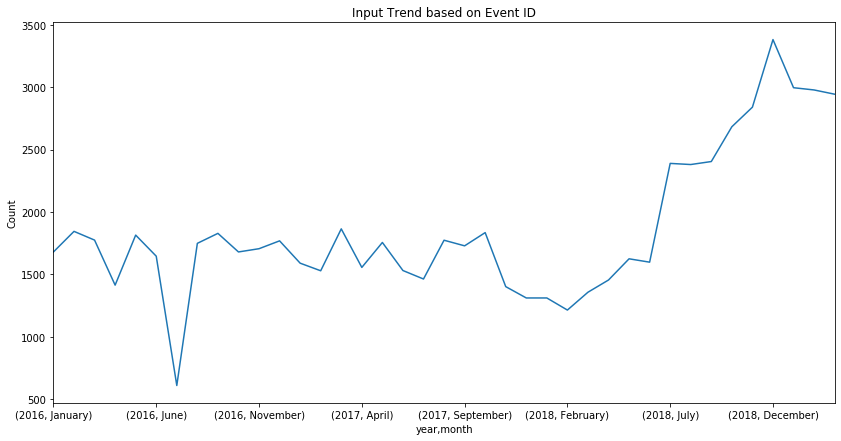

In [554]:
# Visiaulizations of trend in data input over the four years
fig, ax = plt.subplots(figsize=(14, 7))
v_df1.groupby(['year', 'month'], sort=False).count()['event_id'].plot(ax=ax)
plt.title ('Input Trend based on Event ID')
plt.ylabel('Count')
plt.show()

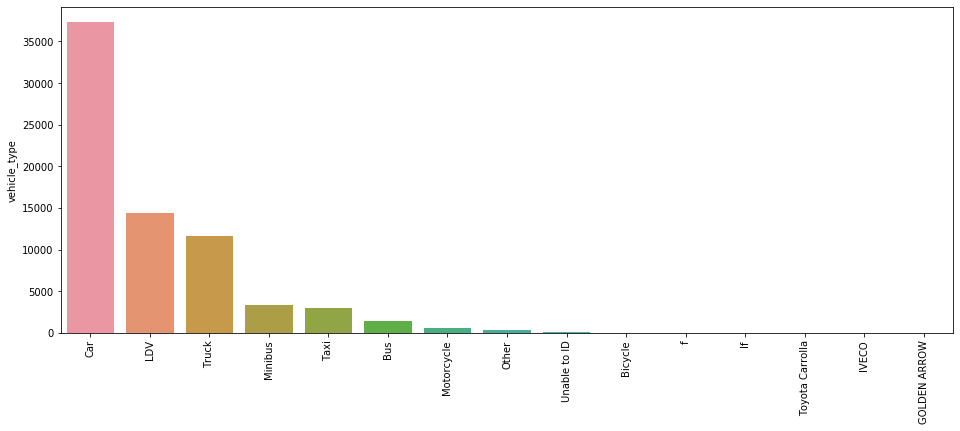

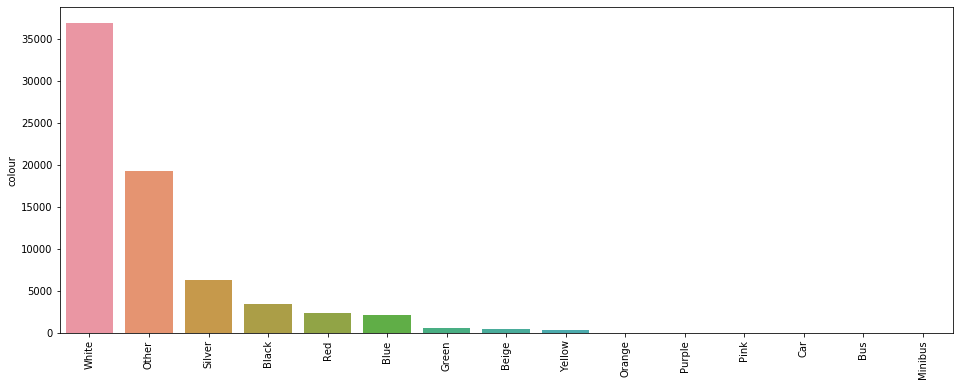

In [555]:
# Visualizations of Categorical variables
v_cat = v_df1[['vehicle_type','colour']]
vi_cat(v_df1, v_cat)

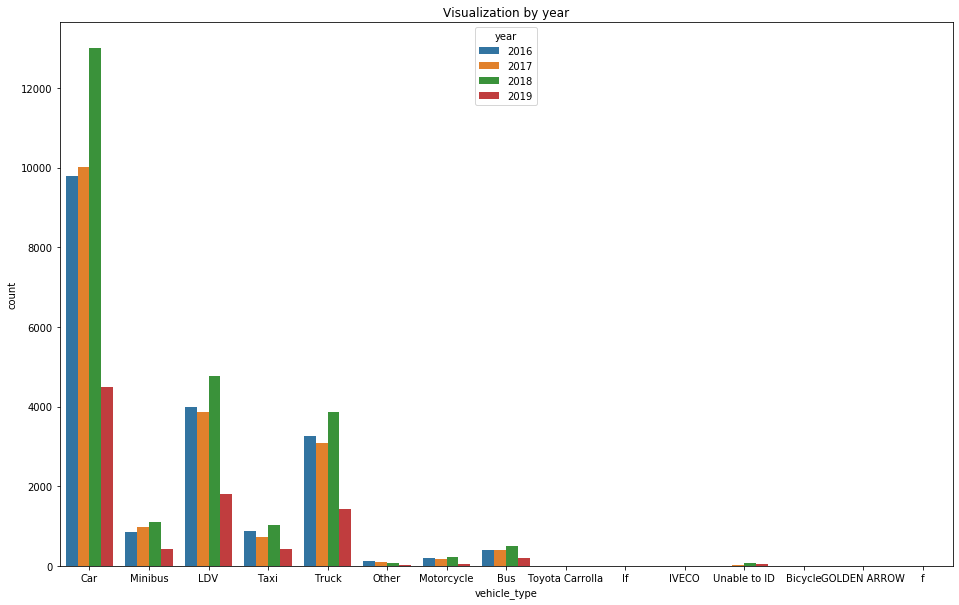

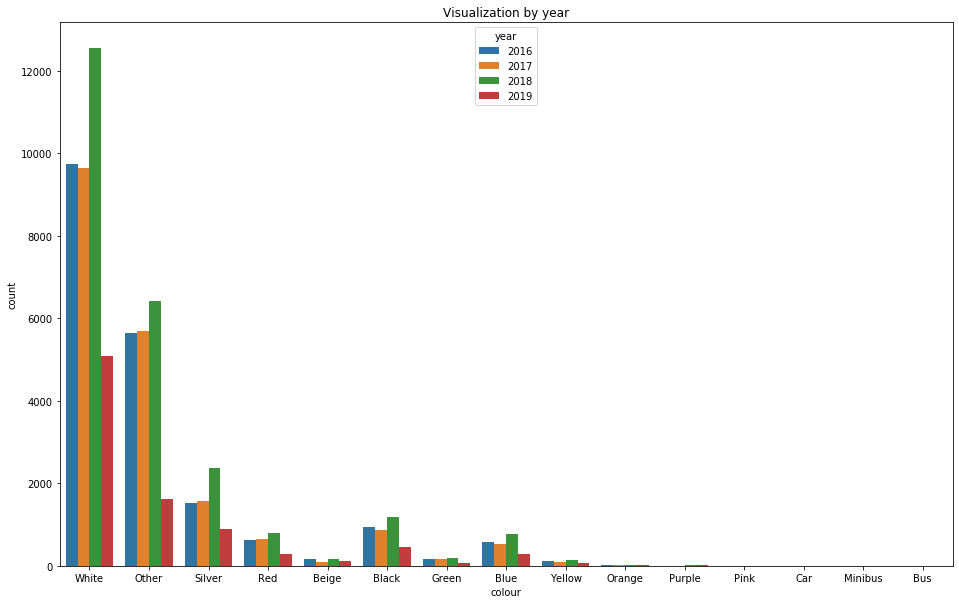

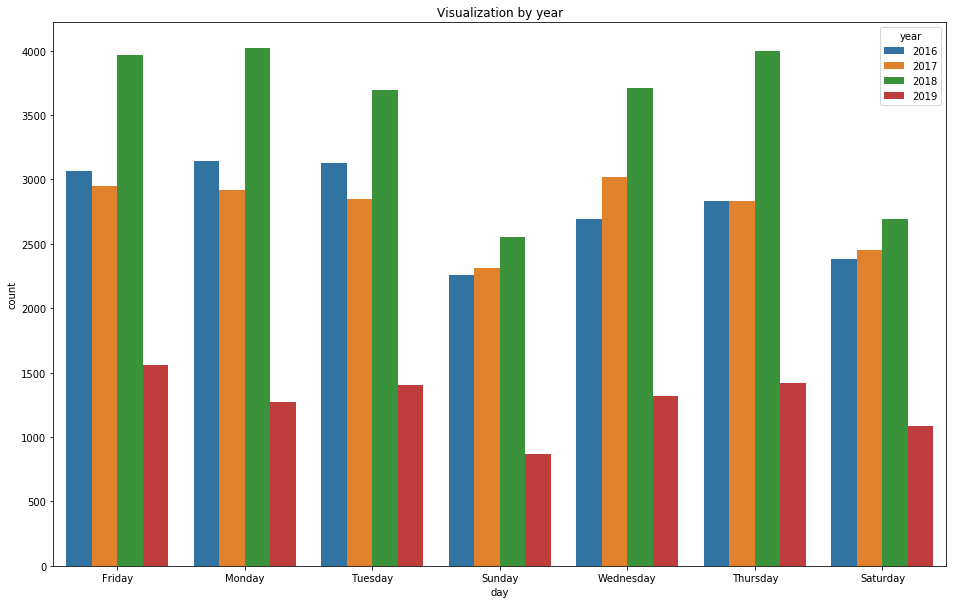

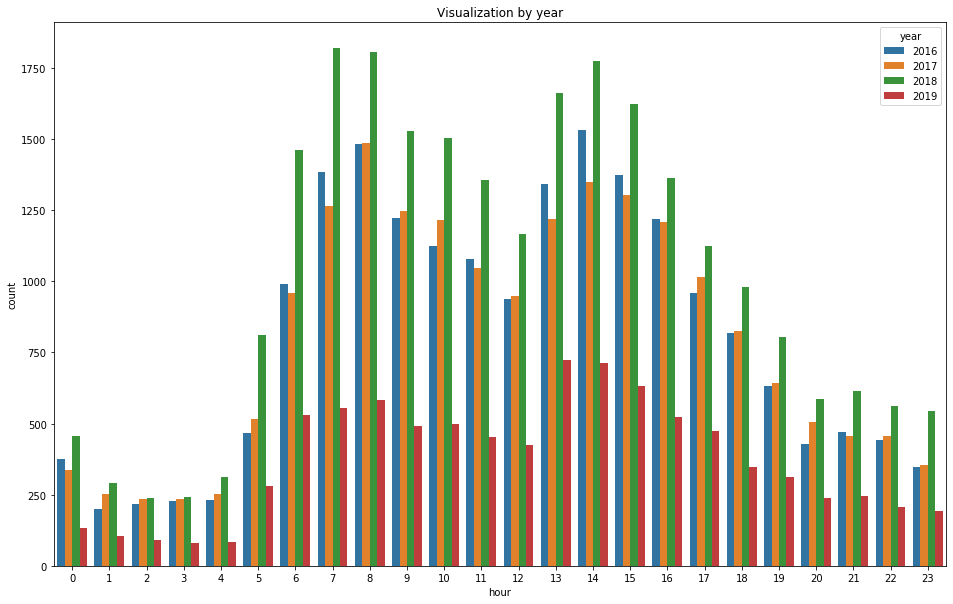

In [564]:
# Visualization of categorical columns by year
cols = v_df1[['vehicle_type','colour','day','hour']]
for x in cols:
    fig = plt.figure(figsize = (16,10))
    sns.countplot(x = x, hue = 'year',data =v_df1)
    plt.title ('Visualization by year')
    plt.show()

In [566]:
v_df1.astype({'event_id': 'int64'}).dtypes

NetworkId                         object
event_id                           int64
created_local_datetime    datetime64[ns]
vehicle_type                      object
colour                            object
year                               int64
month                             object
week                               int64
day                               object
hour                               int64
minute                             int64
dtype: object

###  Injuries dataset

In [437]:
# Shape of injuries data
print(Inj_dat.shape)
Inj_dat.head()

(26307, 5)


,Network ID,Event Id,Created Local Date Time,No Injuries,Injury Type
0,WC,60560,01/01/16 02:23,2,Light
1,WC,60565,01/01/16 07:05,4,Severe
2,WC,60569,01/01/16 08:43,1,Light
3,WC,60626,03/01/16 03:47,5,Light
4,WC,60631,03/01/16 08:40,2,Light


In [438]:
# print(Inj_dat['No Injuries'].value_counts())
Inj_dat.dtypes

Network ID                 object
Event Id                    int64
Created Local Date Time    object
No Injuries                 int64
Injury Type                object
dtype: object

In [439]:
# Changing the local datetime datatype
Inj_dat['Created Local Date Time'] = pd.to_datetime(Inj_dat['Created Local Date Time'])
Inj_dat.head()

,Network ID,Event Id,Created Local Date Time,No Injuries,Injury Type
0,WC,60560,2016-01-01 02:23:00,2,Light
1,WC,60565,2016-01-01 07:05:00,4,Severe
2,WC,60569,2016-01-01 08:43:00,1,Light
3,WC,60626,2016-03-01 03:47:00,5,Light
4,WC,60631,2016-03-01 08:40:00,2,Light


In [440]:
# Renaming columns
i_df = Inj_dat.copy()
col_indices = [0,1,2,3,4]
n = ['network_id','event_id','created_local_datetime','injuries','injuries_type']
o = i_df.columns[col_indices]
i_df.rename(columns = dict(zip(o,n)),inplace = True)
i_df.head()

,network_id,event_id,created_local_datetime,injuries,injuries_type
0,WC,60560,2016-01-01 02:23:00,2,Light
1,WC,60565,2016-01-01 07:05:00,4,Severe
2,WC,60569,2016-01-01 08:43:00,1,Light
3,WC,60626,2016-03-01 03:47:00,5,Light
4,WC,60631,2016-03-01 08:40:00,2,Light


In [441]:
# Checking for null values
i_df.isna().sum()

network_id                0
event_id                  0
created_local_datetime    0
injuries                  0
injuries_type             0
dtype: int64

In [530]:
# Checking value counts
for c in i_df.columns:
    print('*'*50)
    print('Value counts of ', c)
    print('*'*50)
    print(i_df[c].value_counts())

**************************************************
Value counts of  network_id
**************************************************
WC    26307
Name: network_id, dtype: int64
**************************************************
Value counts of  event_id
**************************************************
71602     3
98287     3
111102    3
81668     3
61018     3
         ..
150140    1
148093    1
154238    1
152191    1
133121    1
Name: event_id, Length: 26145, dtype: int64
**************************************************
Value counts of  created_local_datetime
**************************************************
2019-02-22 08:50:00    3
2019-03-13 09:38:00    3
2019-02-13 11:31:00    3
2019-03-19 16:29:00    3
2017-07-04 23:50:00    3
                      ..
2017-12-31 10:05:00    1
2019-02-26 13:58:00    1
2018-07-11 15:09:00    1
2019-01-24 21:23:00    1
2018-08-19 14:39:00    1
Name: created_local_datetime, Length: 25159, dtype: int64
************************************************

### Minor Data Engineering on Injuries Data

In [531]:
# Forming new columns by splitting the local_datetime 
i_df['year'] = i_df['created_local_datetime'].dt.year
i_df['month'] = i_df['created_local_datetime'].dt.month_name()
i_df['week'] = i_df['created_local_datetime'].dt.week
i_df['day'] = i_df['created_local_datetime'].dt.day_name()
i_df['hour'] = i_df['created_local_datetime'].dt.hour
i_df['minute'] = i_df['created_local_datetime'].dt.minute
# i_df['date'] = i_df['created_local_datetime'].dt.date
print('*'*50)
print('Count of data input each year')
print('*'*50)
print(i_df['year'].value_counts())
i_df.head()

**************************************************
Count of data input each year
**************************************************
2018    14740
2019     9366
2017     1622
2016      579
Name: year, dtype: int64


,network_id,event_id,created_local_datetime,injuries,injuries_type,year,month,week,day,hour,minute,date
0,WC,60560,2016-01-01 02:23:00,2,Light,2016,January,53,Friday,2,23,2016-01-01
1,WC,60565,2016-01-01 07:05:00,4,Severe,2016,January,53,Friday,7,5,2016-01-01
2,WC,60569,2016-01-01 08:43:00,1,Light,2016,January,53,Friday,8,43,2016-01-01
3,WC,60626,2016-03-01 03:47:00,5,Light,2016,March,9,Tuesday,3,47,2016-03-01
4,WC,60631,2016-03-01 08:40:00,2,Light,2016,March,9,Tuesday,8,40,2016-03-01


In [577]:
i_df.dtypes

network_id                        object
event_id                           int64
created_local_datetime    datetime64[ns]
injuries                           int64
injuries_type                     object
year                               int64
month                             object
week                               int64
day                               object
hour                               int64
minute                             int64
date                              object
dtype: object

In [523]:
# Checking the number of months in each year
y_mon = i_df.groupby(['year','month'])
y_mon.first()

network_id  event_id created_local_datetime  injuries  \
year month                                                             
2016 April             WC     60659    2016-04-01 02:39:00         7   
     August            WC     63370    2016-08-02 07:48:00         1   
     December          WC     63743    2016-12-02 11:16:00         1   
     February          WC     62825    2016-02-02 06:49:00         1   
     January           WC     60560    2016-01-01 02:23:00         2   
     July              WC     60888    2016-07-01 16:00:00         1   
     June              WC     60820    2016-06-01 17:01:00         1   
     March             WC     60626    2016-03-01 03:47:00         5   
     May               WC     60773    2016-05-01 17:59:00         2   
     November          WC     61149    2016-11-01 17:39:00         1   
     October           WC     63599    2016-10-02 20:27:00         1   
     September         WC     60973    2016-09-01 01:28:00         1   
2017 April             WC     92795    2017-04-02 02:07:00         1   
     August            WC     93079    2017-08-02 08:49:00         2   
     December          WC     91167    2017-12-01 17:18:00         1   
     February          WC     90618    2017-02-01 17:48:00         1   
     January           WC     90535    2017-01-01 01:58:00         1   
     July              WC     93023    2017-07-02 13:34:00         2   
     June              WC     90886    2017-06-01 14:06:00         1   
     March             WC     90668    2017-03-01 12:13:00         1   
     May               WC     90814    2017-05-01 16:33:00         1   
     November          WC     93300    2017-11-02 08:23:00         2   
     October           WC     93234    2017-10-02 07:46:00         1   
     September         WC     91041    2017-09-01 17:52:00         1   
2018 August            WC    135280    2018-08-01 07:16:00         0   
     December          WC    147905    2018-12-01 01:21:00         0   
     July              WC    132287    2018-07-01 03:14:00         0   
     November          WC    144375    2018-11-01 00:06:00         0   
     October           WC    141099    2018-10-01 01:08:00         0   
     September         WC    138155    2018-09-01 00:35:00         0   
2019 February          WC    156949    2019-02-01 03:16:00         0   
     January           WC    152150    2019-01-01 00:07:00         0   
     March             WC    161628    2019-03-01 03:22:00         2   

               injuries_type  week        day  hour  minute  
year month                                                   
2016 April             Light    13     Friday     2      39  
     August            Light    31    Tuesday     7      48  
     December          Light    48     Friday    11      16  
     February          Light     5    Tuesday     6      49  
     January           Light    53     Friday     2      23  
     July              Light    26     Friday    16       0  
     June              Light    22  Wednesday    17       1  
     March             Light     9    Tuesday     3      47  
     May               Light    17     Sunday    17      59  
     November          Light    44    Tuesday    17      39  
     October        Fatality    39     Sunday    20      27  
     September      Fatality    35   Thursday     1      28  
2017 April             Light    13     Sunday     2       7  
     August            Light    31  Wednesday     8      49  
     December          Light    48     Friday    17      18  
     February       Fatality     5  Wednesday    17      48  
     January          Severe    52     Sunday     1      58  
     July             Severe    26     Sunday    13      34  
     June              Light    22   Thursday    14       6  
     March          Fatality     9  Wednesday    12      13  
     May            Fatality    18     Monday    16      33  
     November       Fatality    44   Thursday     8      23  
     O

In [524]:
y_y = i_df.groupby(['year'])
y_y.first()

,network_id,event_id,created_local_datetime,injuries,injuries_type,month,week,day,hour,minute
year,,,,,,,,,,
2016,WC,60560,2016-01-01 02:23:00,2,Light,January,53,Friday,2,23
2017,WC,90535,2017-01-01 01:58:00,1,Severe,January,52,Sunday,1,58
2018,WC,132287,2018-07-01 03:14:00,0,None,July,26,Sunday,3,14
2019,WC,152150,2019-01-01 00:07:00,0,None,January,1,Tuesday,0,7


### EDA on the Injuries data

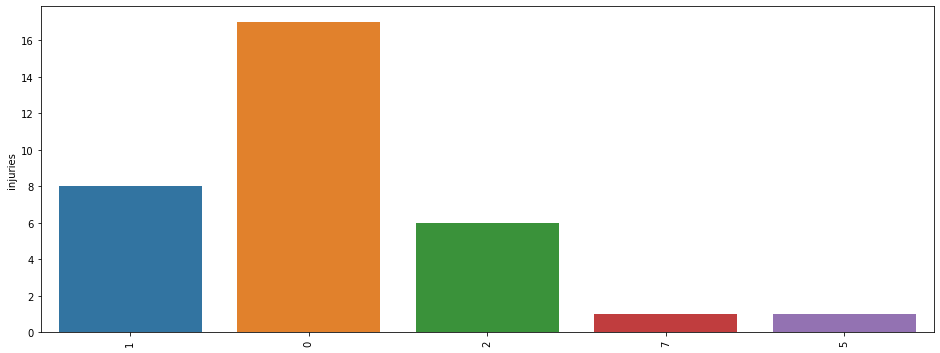

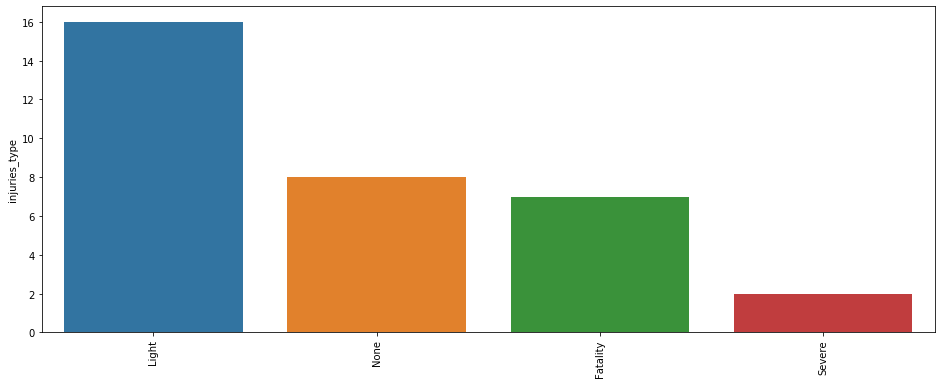

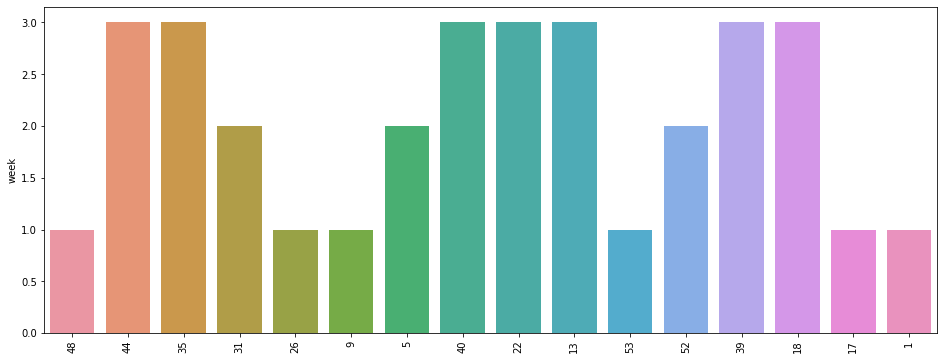

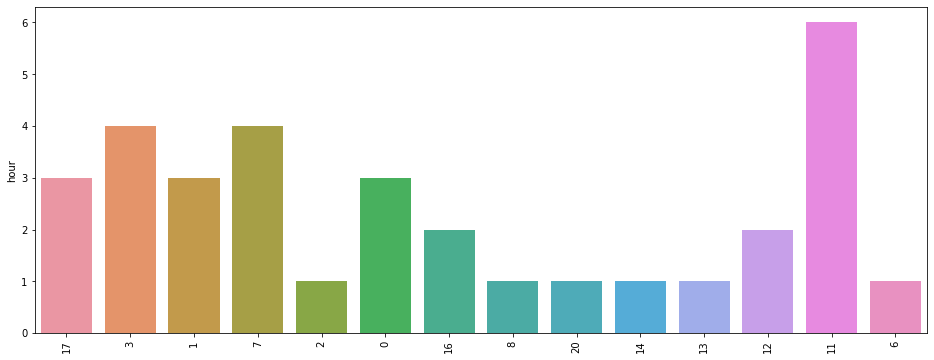

In [509]:
gg = y_mon.first()
gv = gg[['injuries','injuries_type','week','hour']]
vi_cat(gg,gv)

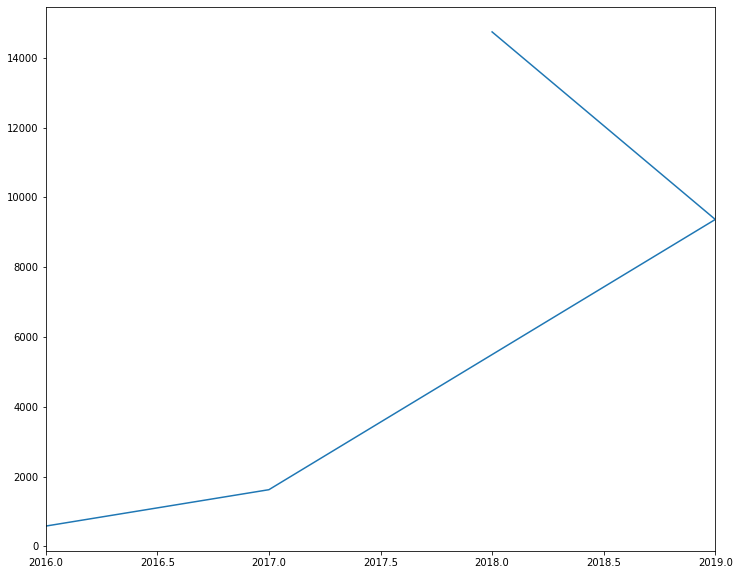

In [541]:
# Trend line of input data by year
fig = plt.figure(figsize = (12,10))
i_df['year'].value_counts().sort_values().plot.line()
plt.show()

In [517]:
i_df2 = i_df.copy()
#Indexing the year column
i_df2.set_index('year', inplace = True)
i_df2.head()
sns.barplot()

,network_id,event_id,created_local_datetime,injuries,injuries_type,month,week,day,hour,minute
year,,,,,,,,,,
2016,WC,60560,2016-01-01 02:23:00,2,Light,January,53,Friday,2,23
2016,WC,60565,2016-01-01 07:05:00,4,Severe,January,53,Friday,7,5
2016,WC,60569,2016-01-01 08:43:00,1,Light,January,53,Friday,8,43
2016,WC,60626,2016-03-01 03:47:00,5,Light,March,9,Tuesday,3,47
2016,WC,60631,2016-03-01 08:40:00,2,Light,March,9,Tuesday,8,40


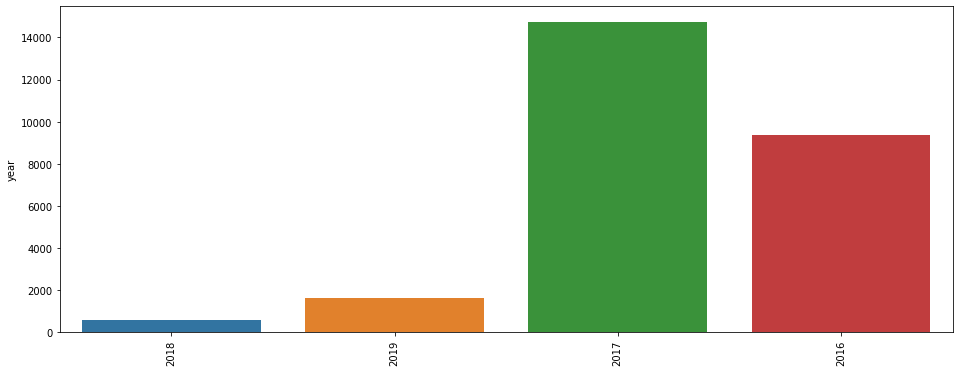

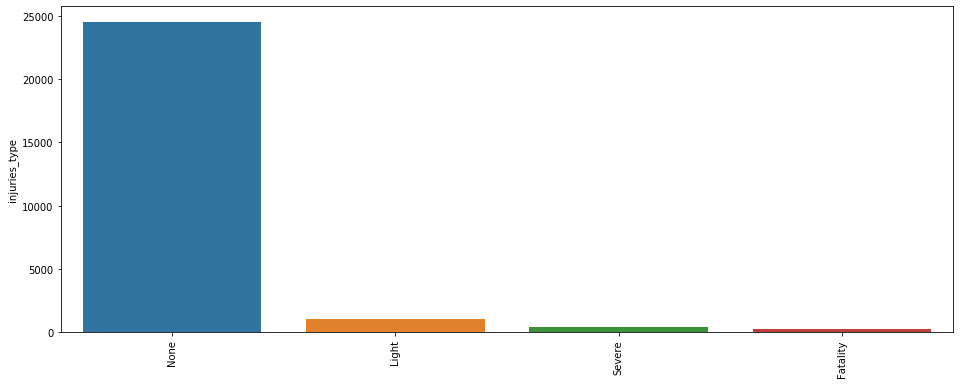

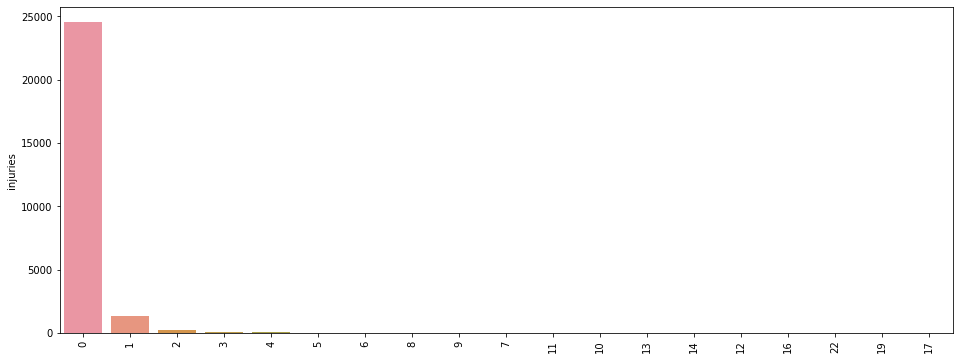

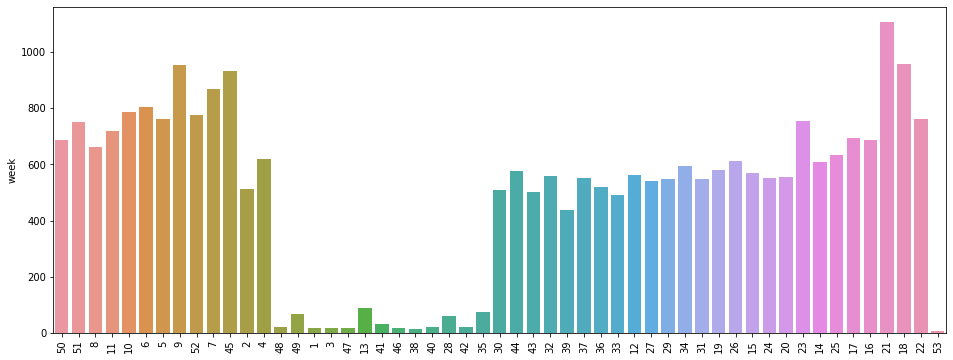

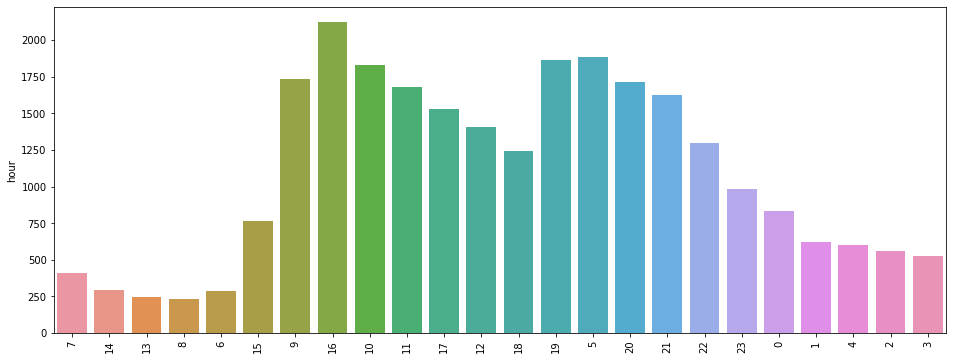

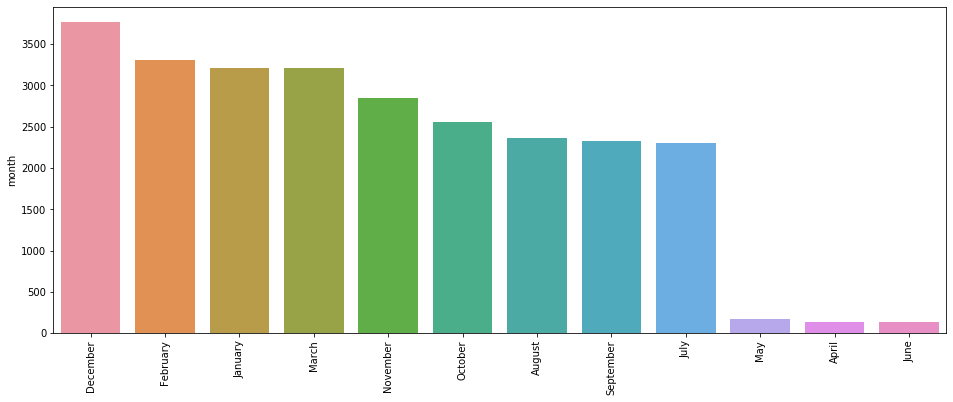

In [502]:
# Making a DF based on categorical values
i_cat = i_df[['year','injuries_type','injuries','week','hour','month']]
#Visualization on the categorical data on the Injuries data
vi_cat(i_df,i_cat)

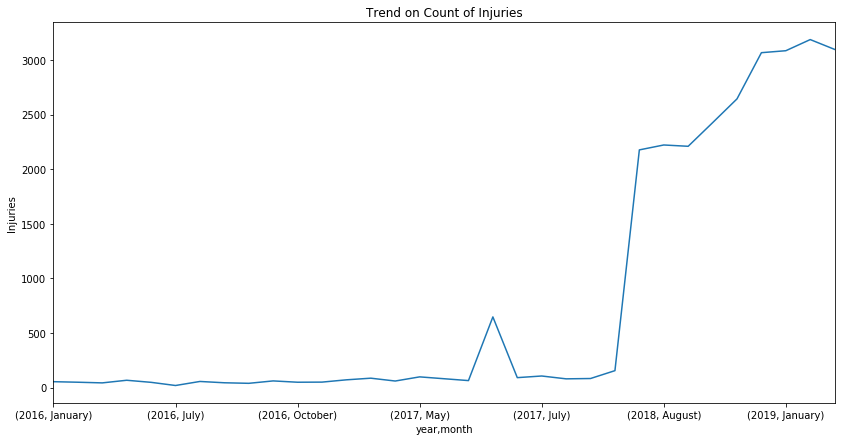

In [537]:
# Visualization of Injuries dataset by year
fig, ax = plt.subplots(figsize=(14, 7))
i_df.groupby(['year', 'month'], sort=False).count()['injuries'].plot(ax=ax)
plt.title ('Trend on Count of Injuries')
plt.ylabel('Injuries')
plt.show()

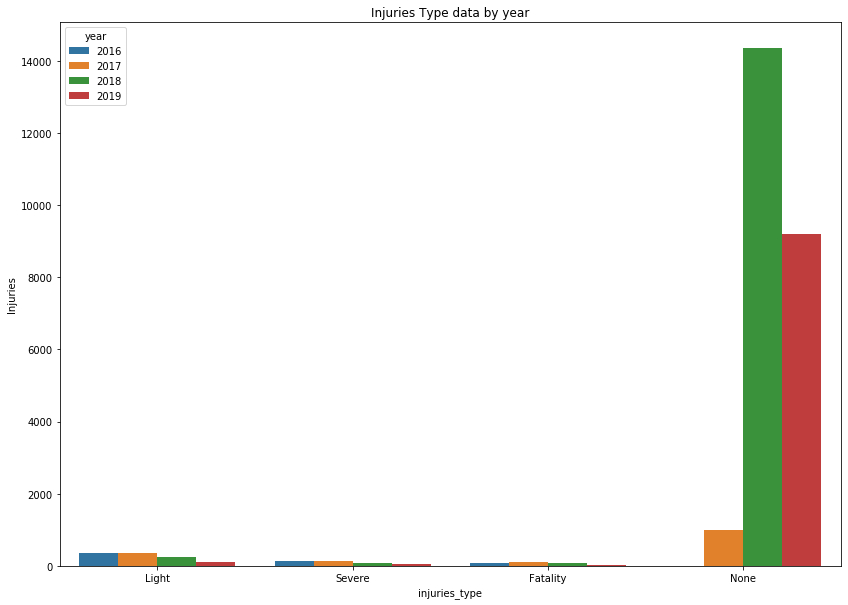

In [546]:
# Visualization of injuries type by year
fig = plt.figure(figsize = (14,10))
sns.countplot(x = 'injuries_type',hue = 'year',data =i_df)
plt.title ('Injuries Type data by year')
plt.ylabel('Injuries')
plt.show()

### Key Observations
- From the above observation, it is worth noting that they `year` **2017** appears to have the highest input of data in the injuries dataset
- **December** has the highest input of data
- **0** has the highest frequency in `injuries` and **None** has the highest number in `injuries_type`

In both datasets 2018 has the highest number of data input. Consideration of merging both datasets is recommended 

### Merging both vehicles and injuries data

In [568]:
# Merging both datasets with a left join
iv_df = pd.merge(v_df1,i_df,how ='left',on ='event_id' )
print(iv_df.shape)
iv_df.head()

(72659, 22)


,NetworkId,event_id,created_local_datetime_x,vehicle_type,colour,year_x,month_x,week_x,day_x,hour_x,...,created_local_datetime_y,injuries,injuries_type,year_y,month_y,week_y,day_y,hour_y,minute_y,date
0,WC,60558.0,2016-01-01 00:52:00,Car,White,2016,January,53,Friday,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WC,60559.0,2016-01-01 00:49:00,Car,Other,2016,January,53,Friday,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,...,2016-01-01 02:23:00,2.0,Light,2016.0,January,53.0,Friday,2.0,23.0,2016-01-01
3,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,...,2016-01-01 02:23:00,2.0,Light,2016.0,January,53.0,Friday,2.0,23.0,2016-01-01
4,WC,60561.0,2016-01-01 02:55:00,Car,White,2016,January,53,Friday,2,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above merge, as is expected, missing data is apparent due to the missing months in the injuries dataset. Suggested steps
1. Drop `month_y`,`week_y`,`day_y`,`year_y`, and `date` from the dataset
2. Explore ways to impute data in the missing rows to deal with the nulls values
3. Rename the colums

In [569]:
iv_df2 = iv_df.copy()
iv_df2.drop(['year_y','month_y','week_y','day_y','date'], axis = 1, inplace = True)
iv_df2.head()

,NetworkId,event_id,created_local_datetime_x,vehicle_type,colour,year_x,month_x,week_x,day_x,hour_x,minute_x,network_id,created_local_datetime_y,injuries,injuries_type,hour_y,minute_y
0,WC,60558.0,2016-01-01 00:52:00,Car,White,2016,January,53,Friday,0,52,NaN,NaT,NaN,NaN,NaN,NaN
1,WC,60559.0,2016-01-01 00:49:00,Car,Other,2016,January,53,Friday,0,49,NaN,NaT,NaN,NaN,NaN,NaN
2,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,WC,2016-01-01 02:23:00,2.0,Light,2.0,23.0
3,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,WC,2016-01-01 02:23:00,2.0,Light,2.0,23.0
4,WC,60561.0,2016-01-01 02:55:00,Car,White,2016,January,53,Friday,2,55,NaN,NaT,NaN,NaN,NaN,NaN


In [570]:
# Dropping other columns
iv_df2.drop(['network_id','created_local_datetime_y','hour_y','minute_y'], axis = 1, inplace = True)
iv_df2.head()

,NetworkId,event_id,created_local_datetime_x,vehicle_type,colour,year_x,month_x,week_x,day_x,hour_x,minute_x,injuries,injuries_type
0,WC,60558.0,2016-01-01 00:52:00,Car,White,2016,January,53,Friday,0,52,NaN,NaN
1,WC,60559.0,2016-01-01 00:49:00,Car,Other,2016,January,53,Friday,0,49,NaN,NaN
2,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,2.0,Light
3,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,2.0,Light
4,WC,60561.0,2016-01-01 02:55:00,Car,White,2016,January,53,Friday,2,55,NaN,NaN


In [572]:
#Renaming the columns
cols_indices = [0,2,5,6,7,8,9,10]
new_names = ['network_id','created_local_datetime','year','month','week','day','hour','minute']
old_names = iv_df2.columns[cols_indices]
iv_df2.rename(columns = dict(zip(old_names,new_names)),inplace = True)
print(iv_df2.shape)
iv_df2.head()

(72659, 13)


,network_id,event_id,created_local_datetime,vehicle_type,colour,year,month,week,day,hour,minute,injuries,injuries_type
0,WC,60558.0,2016-01-01 00:52:00,Car,White,2016,January,53,Friday,0,52,NaN,NaN
1,WC,60559.0,2016-01-01 00:49:00,Car,Other,2016,January,53,Friday,0,49,NaN,NaN
2,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,2.0,Light
3,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,2.0,Light
4,WC,60561.0,2016-01-01 02:55:00,Car,White,2016,January,53,Friday,2,55,NaN,NaN


In [573]:
iv_df2.isna().sum()

network_id                    0
event_id                      0
created_local_datetime        0
vehicle_type                  0
colour                        0
year                          0
month                         0
week                          0
day                           0
hour                          0
minute                        0
injuries                  47081
injuries_type             47081
dtype: int64

In [575]:
iv_df2.describe()

,event_id,year,week,hour,minute,injuries
count,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000,25578.000000
mean,113551.604302,2017.315900,25.580272,12.071842,29.936305,0.199429
std,29919.323130,1.000675,15.788560,5.333417,17.117777,0.911447
min,60558.000000,2016.000000,1.000000,0.000000,0.000000,0.000000
25%,88637.500000,2016.000000,11.000000,8.000000,15.000000,0.000000
50%,113498.000000,2017.000000,25.000000,12.000000,30.000000,0.000000
75%,139199.500000,2018.000000,40.000000,16.000000,45.000000,0.000000
max,166135.000000,2019.000000,53.000000,23.000000,59.000000,22.000000


In [576]:
iv_df2['injuries'].value_counts()

0.0     22882
1.0      1842
2.0       400
3.0       167
4.0       117
5.0        38
8.0        21
6.0        21
11.0       19
9.0        18
7.0        16
10.0        8
13.0        7
14.0        6
16.0        6
22.0        4
12.0        4
17.0        1
19.0        1
Name: injuries, dtype: int64

From the describe the mean and median of `injuries` is **0**, therefore it may be viable to impute 0 to the missing data in that column seeing as the data is already skewed to 0. Alternatively, we could run an algorithm that may best informed the missing data becuase the missing data counts for more than half of the datapoints

In [607]:
# Percentage of null values
null = ((47081)/72659)*100
null

64.79720337466797

There are ***47081*** null values in both the `injuries` and `injuries_type` columns which accounts for ***64.8%*** of the dataset. Perhaps passing the data through a regression model might best predict the missing data.

In [608]:
# Creating a copy of the dataset
iv_df3 = iv_df2.copy()
iv_df2.head()

,network_id,event_id,created_local_datetime,vehicle_type,colour,year,month,week,day,hour,minute,injuries,injuries_type
0,WC,60558.0,2016-01-01 00:52:00,Car,White,2016,January,53,Friday,0,52,NaN,NaN
1,WC,60559.0,2016-01-01 00:49:00,Car,Other,2016,January,53,Friday,0,49,NaN,NaN
2,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,2.0,Light
3,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,2.0,Light
4,WC,60561.0,2016-01-01 02:55:00,Car,White,2016,January,53,Friday,2,55,NaN,NaN


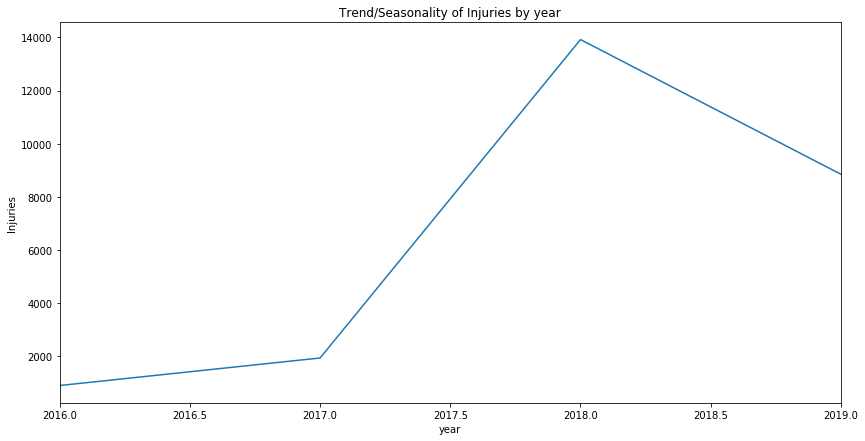

In [609]:
# Assessing the seasonal and/or tend aspect of injuries in the dataset
fig, ax = plt.subplots(figsize=(14, 7))
iv_df3.groupby(['year'], sort=False).count()['injuries'].plot(ax=ax)
plt.title ('Trend/Seasonality of Injuries by year')
plt.ylabel('Injuries')
plt.show()

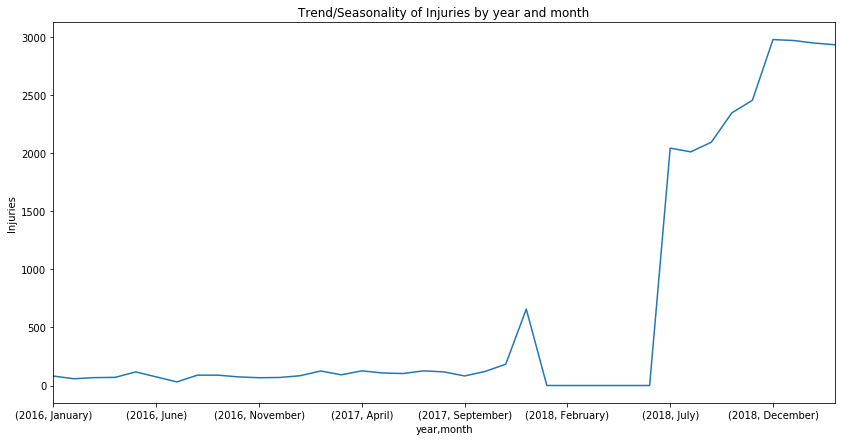

In [610]:
fig, ax = plt.subplots(figsize=(14, 7))
iv_df3.groupby(['year','month'], sort=False).count()['injuries'].plot(ax=ax)
plt.title ('Trend/Seasonality of Injuries by year and month')
plt.ylabel('Injuries')
plt.show()

It appears there a sudden increase of recorded injuries in 2018 and then a minor dip as the year ends into 2019. An obvious 'plateau' line is apparent between February 2018 and July 2018 due to the missing data. I think using `seasonal adjustment` and `linear interpolation` may predict the missing data well.

**Will reference from a certian code in an attempt to fill the missing data**

In [611]:
# Indexing the date column
iv_df3.drop('injuries_type', axis = 1, inplace = True)
m_df = iv_df3.set_index('created_local_datetime')
m_df.head()

,network_id,event_id,vehicle_type,colour,year,month,week,day,hour,minute,injuries
created_local_datetime,,,,,,,,,,,
2016-01-01 00:52:00,WC,60558.0,Car,White,2016,January,53,Friday,0,52,NaN
2016-01-01 00:49:00,WC,60559.0,Car,Other,2016,January,53,Friday,0,49,NaN
2016-01-01 02:23:00,WC,60560.0,Car,Other,2016,January,53,Friday,2,23,2.0
2016-01-01 02:23:00,WC,60560.0,Car,Other,2016,January,53,Friday,2,23,2.0
2016-01-01 02:55:00,WC,60561.0,Car,White,2016,January,53,Friday,2,55,NaN


In [613]:
print(m_df.shape)
m_df.isna().sum()

(72659, 11)


network_id          0
event_id            0
vehicle_type        0
colour              0
year                0
month               0
week                0
day                 0
hour                0
minute              0
injuries        47081
dtype: int64

In [622]:
# Imputing using Interplolation Linear
m_df =round(m_df.assign(InterpolateLinear = m_df.injuries.interpolate(method = 'linear')),0)

In [623]:
m_df.isna().sum()

network_id               0
event_id                 0
vehicle_type             0
colour                   0
year                     0
month                    0
week                     0
day                      0
hour                     0
minute                   0
injuries             47081
InterpolateLinear        2
dtype: int64

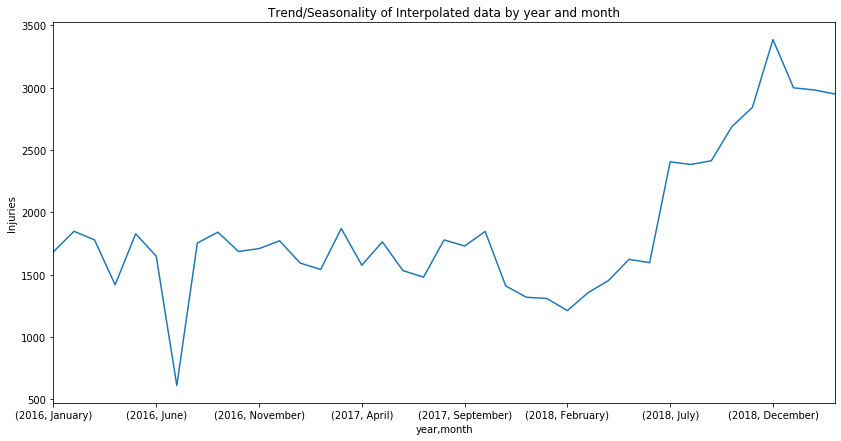

In [624]:
# Assessing the Interpolated data
fig, ax = plt.subplots(figsize=(14, 7))
m_df.groupby(['year','month'], sort=False).count()['InterpolateLinear'].plot(ax=ax)
plt.title ('Trend/Seasonality of Interpolated data by year and month')
plt.ylabel('Injuries')
plt.show()

In [625]:
m_df.describe()

,event_id,year,week,hour,minute,injuries,InterpolateLinear
count,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000,25578.000000,72657.000000
mean,113551.604302,2017.315900,25.580272,12.071842,29.936305,0.199429,0.931335
std,29919.323130,1.000675,15.788560,5.333417,17.117777,0.911447,1.499084
min,60558.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,88637.500000,2016.000000,11.000000,8.000000,15.000000,0.000000,0.000000
50%,113498.000000,2017.000000,25.000000,12.000000,30.000000,0.000000,1.000000
75%,139199.500000,2018.000000,40.000000,16.000000,45.000000,0.000000,1.000000
max,166135.000000,2019.000000,53.000000,23.000000,59.000000,22.000000,22.000000


In [626]:
# Plotting the data after interplolation
m_df['InterpolateLinear'].value_counts()

0.0     33987
1.0     25661
2.0      7383
3.0      2402
4.0      1197
5.0       572
6.0       419
7.0       291
8.0       198
9.0       128
10.0       91
13.0       88
11.0       82
12.0       78
14.0       45
16.0       13
15.0       13
17.0        4
22.0        4
19.0        1
Name: InterpolateLinear, dtype: int64

In [639]:
# Copy new dataset
iv_df5 = iv_df2.copy()
print(iv_df5.shape)
iv_df5.head()

(72659, 13)


,network_id,event_id,created_local_datetime,vehicle_type,colour,year,month,week,day,hour,minute,injuries,injuries_type
0,WC,60558.0,2016-01-01 00:52:00,Car,White,2016,January,53,Friday,0,52,NaN,NaN
1,WC,60559.0,2016-01-01 00:49:00,Car,Other,2016,January,53,Friday,0,49,NaN,NaN
2,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,2.0,Light
3,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,2.0,Light
4,WC,60561.0,2016-01-01 02:55:00,Car,White,2016,January,53,Friday,2,55,NaN,NaN


Now attempting to impute the data to original dataset

In [641]:
# Using linear interpolation to impute missing data
iv_df5 = round(iv_df5.assign(injuries_new = iv_df5.injuries.interpolate(method = 'linear')),0)
print(iv_df5.shape)
iv_df5.head()

(72659, 14)


,network_id,event_id,created_local_datetime,vehicle_type,colour,year,month,week,day,hour,minute,injuries,injuries_type,injuries_new
0,WC,60558.0,2016-01-01 00:52:00,Car,White,2016,January,53,Friday,0,52,NaN,NaN,NaN
1,WC,60559.0,2016-01-01 00:49:00,Car,Other,2016,January,53,Friday,0,49,NaN,NaN,NaN
2,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,2.0,Light,2.0
3,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,2.0,Light,2.0
4,WC,60561.0,2016-01-01 02:55:00,Car,White,2016,January,53,Friday,2,55,NaN,NaN,2.0


In [651]:
# Checking null values
iv_df5.isna().sum()

network_id                    0
event_id                      0
created_local_datetime        0
vehicle_type                  0
colour                        0
year                          0
month                         0
week                          0
day                           0
hour                          0
minute                        0
injuries                  47081
injuries_type             47081
injuries_new                  2
dtype: int64

In [652]:
# Dropping original injuries column
iv_df5.drop('injuries',axis = 1, inplace =True)
iv_df5.head()

,network_id,event_id,created_local_datetime,vehicle_type,colour,year,month,week,day,hour,minute,injuries_type,injuries_new
0,WC,60558.0,2016-01-01 00:52:00,Car,White,2016,January,53,Friday,0,52,NaN,NaN
1,WC,60559.0,2016-01-01 00:49:00,Car,Other,2016,January,53,Friday,0,49,NaN,NaN
2,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,Light,2.0
3,WC,60560.0,2016-01-01 02:23:00,Car,Other,2016,January,53,Friday,2,23,Light,2.0
4,WC,60561.0,2016-01-01 02:55:00,Car,White,2016,January,53,Friday,2,55,NaN,2.0


In [656]:
# Checking the value counts in injuries_type
iv_df5['injuries_type'].value_counts()

None        22882
Light        1812
Severe        562
Fatality      322
Name: injuries_type, dtype: int64

In [657]:
# Replacing the null values with None where injuries is 0.0
iv_df5.loc[iv_df5.injuries_new == 0.0, 'injuries_type'] = 'None'

In [1]:
# iv_df5['injuries_new'].value_counts()

In [659]:
# Checking null values
iv_df5.isna().sum()

network_id                    0
event_id                      0
created_local_datetime        0
vehicle_type                  0
colour                        0
year                          0
month                         0
week                          0
day                           0
hour                          0
minute                        0
injuries_type             35976
injuries_new                  2
dtype: int64

Need to asses all possible ways of filling in this data. So far, I have not establish a fitting method of filling in the missing data.

### Opening the `VariableNames.csv` dataset

In [444]:
v_names = pd.read_csv(sanral.open('SANRAL_v2/Vehicle detection sensor (VDS)/VariableNames_VDS.csv'))
# 'SANRAL_v2/Vehicle detection sensor (VDS)/VariableNames_VDS.csv'
v_names.head()

,Column,Data description,Notes
0,A,Region,Western Cape (WC) only
1,B,Site name,Basically where the device is located that pul...
2,C,Date of Collection Period,Date of Collection Period
3,D,Hour of Collection Period,"Hour of Collection Period; 0 – midniight, 1 – ..."
4,E,Vehicle Class Type,NaN


### Minor Recommendations and Queries on the SANRAL Dataset

1. The challenge of the site-names which infringes upon adequate significance of the SANRAL data
2. It is worth noting that the hourly input of data could be useful in training the model.
3. Intiuition behind cleaning the data. Keen focus on site_name as we ca use the column to merge datasets and extract key information on location and distance
4. Injuries and Vehicles data could be merged using the `EventId` columns. Deliberation on the importance of the Sanral Dataset is however still in question
5. Merging these datasets could be helpful in understanding the types of colour and cars that have more incidents/accidents recorded based on the injuries dataset.
6. Examining the high cardinality of the `reporting agency` column in the `train.csv` and thinking through adjusting some of the inputs to improve the cardinality